# Analysis of Mobile-Price-Classification dataset

### by Eugenio Emmolo

# Contents
<br><br>
[1 - Introduction and Dataset description](#1---Introduction-and-Dataset-description)<br>
[2 - Data Exploration](#2---Data-Exploration)<br>
- [2.1 - Features Description](#2.1---Features-Description)<br>
- [2.2 - Some statistics about the dataset](#2.2---Some-statistics-about-the-dataset)<br>
- [2.3 - Sample Class distribution](#2.3---Sample-Class-distribution)<br>
- [2.4 - BoxPlots](#2.4---BoxPlots)<br>
- [2.5 - Boxplot of values assumed by the features separately for each price category](#2.5---Boxplot-of-values-assumed-by-the-features-separately-for-each-price-category)<br>
- [2.6 -  Correlation Matrix](#2.6---Correlation-Matrix)<br>

[3 - Dimensionality Reduction](#3---Dimensionality-Reduction)<br>
- [3.1 - Feature manipulation](#3.1---Feature-manipulation)<br>
- [3.2 - PCA](#3.2---PCA)<br>
- - [3.2.1 - Data visualization with PCA](#3.2.1---Data-visualization-with-PCA)<br>
- - [3.2.2 - PCA Loading Vectors](#3.2.2---PCA-Loading-Vectors)<br>
- - [3.2.3 - PCA Biplot: Plot of the first two principal components and Loading vectors](#3.2.3---PCA-Biplot:-Plot-of-the-first-two-principal-components-and-Loading-vectors)<br>

- [3.3 - Feature selection Exploiting Random Forest classifier](#3.3---Feature-selection-Exploiting-Random-Forest-classifier)<br>

[4 - Classification](#4---Classification)<br>
- [4.1 - Decision Tree](#4.1---Decision-Tree)<br>
- [4.2 - Random Forest](#4.2---Random-Forest)<br>
- [4.3 - Support Vector Machine](#4.3---Support-Vector-Machine)<br>
- [4.4 - K-Nearest Neighbors](#4.4---K-Nearest-Neighbors)<br>
- [4.5 - Performance analysis](#4.5---Performance-analysis)<br>

[5 - Conclusions](#5---Conclusions)<br>

In [1]:
#!pip install hide_code

import csv
from IPython.display import display, HTML
import itertools 
import numpy as np
import pandas as pd
import math
import os
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, recall_score, precision_score, f1_score
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('always')

#Constants
data_folder = 'mobile_phone_train.csv'
pd.set_option('display.max_columns', 500)
num_features = 20         # Number of Columns/Features
num_samples = 2000        # Number of Rows/Samples
num_labels = 4            # Number of labels
numerical_features = 14   # Number of Numerical Columns/Features

df = pd.read_csv(data_folder)

#Array of labels
Y = df[['price_range']].values
Y = Y.ravel()

#All data
X = df[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam', '4G', 'int_memory', 'depth', 
                               'weight', 'n_cores', 'primary_cam', 'talk_time', 'px_height', 'px_width',
                               'ram', 'screen_height', 'screen_width', '3G',
                              'touch_screen', 'wifi']].values
X_complete = X

#Only Numerical data:
df_numerical = df[['battery_power', 'clock_speed', 'front_cam', 'int_memory', 'depth', 
                               'weight', 'n_cores', 'primary_cam', 'talk_time', 'px_height', 'px_width',
                               'ram', 'screen_height', 'screen_width']]

X_numerical = df_numerical.values #Matrix that contains only numerical data
feature_names_numerical = df_numerical.columns #Numerical feature names
X_numerical = ((X_numerical-X_numerical.mean())/X_numerical.std()) #Normalized version of the matrix
df_numerical_std = pd.DataFrame(X_numerical, columns=df_numerical.columns)


colors = ['navy', 'turquoise', 'darkorange', 'gold']
label_names = ["Low", "Medium", "High", "Very-high"]
feature_names = df[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam', '4G', 'int_memory', 'depth', 
                               'weight', 'n_cores', 'primary_cam', 'talk_time', 'px_height', 'px_width',
                               'ram', 'screen_height', 'screen_width', '3G',
                              'touch_screen', 'wifi']].columns

# 1 - Introduction and Dataset description

The analyzed dataset contains information about **mobile phones**: each mobile phone sample is described by **20 features (or predictors)** plus one additional number that refers to the **price range** of the phone.

The dataset includes a total of **2000 labelled samples**.

The price range value is an integer value  $[0-3]$:
- **Zero** refers to a **low** price category
- **One** refers to a **medium-low** price category
- **Two** refers to a **medium-high** price category
- **Three** refers to a **high** price category

The dataset can be found at https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv

In [2]:
print("--- Here there is an extract of the dataset:")
pd.set_option('display.max_rows', 20)
df

--- Here there is an extract of the dataset:


,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,depth,weight,n_cores,primary_cam,px_height,px_width,ram,screen_height,screen_width,talk_time,3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


# 1.1 - Tools and Libraries

- I have chosen to use python3.7 as language code because it is very intuitive and one of the most popular in the Machine Learning world. Also, python have available a lot of powerful libraries that are plug-and-play and pretty easy to use. Compared to the R language, I find python much simpler and intuitive and this is why I have used it.

- I wrote the code in Jupyter Notebook and I have found it very useful since it allows to insert code parts to markdown/textual parts. On top of that, it allows good visualization and graphic tools.

### Main Libraries:

- Pandas: it is an open source libray which provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- Numpy: it is the fundamental package for scientific computing with Python.
- MatplotLib: is a plotting library for the Python programming language that i used to create explanatory graphs.
- Sciki-Learn: open-source library that provides machine-learning tools and algorithms.

# 2 - Data Exploration

In this section I have analyzed the datset pointing out some information that I have considered relevant. 
To do this, I used some boxplots, heatmap and other measures.

## 2.1 - Features Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
bluetooth        2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
front_cam        2000 non-null int64
4G               2000 non-null int64
int_memory       2000 non-null int64
depth            2000 non-null float64
weight           2000 non-null int64
n_cores          2000 non-null int64
primary_cam      2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
screen_height    2000 non-null int64
screen_width     2000 non-null int64
talk_time        2000 non-null int64
3G               2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


As I said before, each mobile phone is described by 20 numerical features that are not only technical details about its hardware components but also values correspondent to the performances of the device. 
More in detail the features are:
- **battery_power**: [Numeric] Total energy that a battery can store in one time measured in mAh; 
- **bluetooth**: [Boolean] It specifies if the device has bluetooth or not;
- **clock_speed**: [Numeric] Speed at which microprocessor executes instructions;
- **dual_sim**: [Boolean] It specifies if the device has dual sim support or not;
- **front_cam**: [Numeric] Front Camera mega pixels;
- **4G**: [Boolean] It specifies if the device has 4G or not;
- **int_memory**: [Numeric] Internal Memory of the device in Gigabytes;
- **depth**: [Numeric] Depth of the device in cm;
- **weight**: [Numeric] Weight of mobile phone;
- **n_cores**: [Numeric] Number of cores of processor;
- **primary_cam**: [Numeric] Primary Camera mega pixels
- **px_height**: [Numeric] Pixel Resolution Height;
- **px_width**:[Numeric] Pixel Resolution Width;
- **ram**: [Numeric] Random Access Memory in Mega Bytes;
- **screen_height**: [Numeric] Screen Height of mobile in cm;
- **screen_width**: [Numeric] Screen Width of mobile in cm;
- **talk_time**: [Numeric] Maximum call time that a single battery charge will suppport;
- **3G**: [Boolean] It specifies if the device has 3G or not
- **touch_screen**: [Boolean] It specifies if the device has touch screen or not;
- **wifi**: [Boolean] It specifies if the device has wifi or not;

In summary, the dataset has a total of **14 Numeric variables** and **6 Boolean variables** that point out the characteristics of each mobile phone.<br><br>
There are no **NULL/missing** values in the datset.

## 2.2 - Some statistics about the dataset

In [4]:
dt = df_numerical.describe()
display(dt.drop('count'))

,battery_power,clock_speed,front_cam,int_memory,depth,weight,n_cores,primary_cam,talk_time,px_height,px_width,ram,screen_height,screen_width
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,11.011000,645.108000,1251.515500,2124.213000,12.306500,5.767000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,5.463955,443.780811,432.199447,1084.732044,4.213245,4.356398
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,2.000000,0.000000,500.000000,256.000000,5.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,6.000000,282.750000,874.750000,1207.500000,9.000000,2.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,11.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,16.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000


The table above shows some statistical measures about each numerical predictor variable of the dataset:

- **Mean** is clearly the average value of the feature taking into account all the samples;
- **Std** is the standard deviation of the features that describes how much data are spread away from the mean value;
- **Max** and **Min** reports the maximum value and the minimum value of the feature in the dataset;
- **25%, 75%** represents the lower and upper quartiles that contains the specified percentage of data;
- **50%** represents the median.

> For example: considering the battery_power variable: 
- The average value is 1238.51 mAh;
- Its standard deviation is 439.42;
- The minimum value in the whole dataset is 501 mAh while the Maximum value is 1998 mAh;
- The 25% percentile is at 851.75 mAh, it means that in the range $[501 , 851.75] $ mAh, the 25% of the entire dataset is contained;
- The same for 50% and 75% percentiles.


**The dataset presents numerical features with very different unit of measure**: for example, "battery power" is 3 order of magnitude bigger that "clock speed", "depth" is three order of magnitude smaller that "px_width" and "ram" and many others.

For this reason I have decided to **normalize the values of the dataset**, in order to smoothen the value differences between the features.

In [5]:
print("Normalized dataset statistics:")
dt = df_numerical_std.describe()
display(dt.drop('count'))

Normalized dataset statistics:


,battery_power,clock_speed,front_cam,int_memory,depth,weight,n_cores,primary_cam,talk_time,px_height,px_width,ram,screen_height,screen_width
mean,1.145206,-0.527338,-0.523569,-0.486066,-0.528718,-0.339766,-0.523284,-0.515988,-0.514508,0.342855,1.162779,2.342754,-0.512757,-0.521599
std,0.594138,0.001103,0.005870,0.024535,0.000390,0.047864,0.003093,0.008200,0.007388,0.600036,0.584377,1.466667,0.005697,0.005890
min,0.148006,-0.528720,-0.529396,-0.526692,-0.529261,-0.421228,-0.528044,-0.529396,-0.526692,-0.529396,0.146654,-0.183258,-0.522636,-0.529396
25%,0.622256,-0.528450,-0.528044,-0.507763,-0.529126,-0.382017,-0.525340,-0.522636,-0.521284,-0.147090,0.653354,1.103266,-0.517227,-0.526692
50%,1.128279,-0.527368,-0.525340,-0.486129,-0.528720,-0.338750,-0.523988,-0.515875,-0.514523,0.233189,1.156674,2.372888,-0.513171,-0.522636
75%,1.654585,-0.526422,-0.519932,-0.464495,-0.528315,-0.299539,-0.519932,-0.509115,-0.507763,0.751381,1.678584,3.614117,-0.507763,-0.517227
max,2.172101,-0.525340,-0.503706,-0.442862,-0.528044,-0.258976,-0.518580,-0.502354,-0.502354,2.120721,2.172101,4.876303,-0.503706,-0.505059


## 2.3 - Sample Class distribution
The dataset is perfectly balanced as it includes 500 samples for each price category, for a total of 2000 samples.
Given the already balanced structure of the dataset, I have considered as useless the employment of any balancing technique.

Text(0, 0.5, 'Number of Samples')

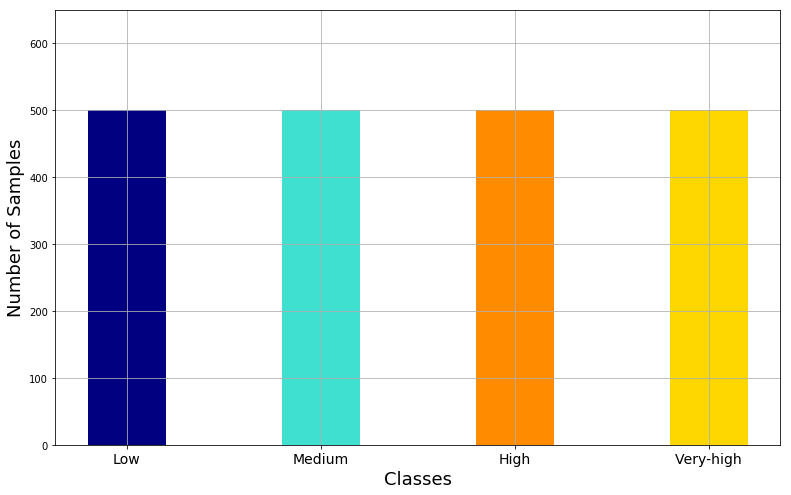

In [6]:
count = [0,0,0,0]

for index, row in df.iterrows():
    if(row['price_range'] == 0):
            count[0] += 1
    if(row['price_range'] == 1):
            count[1] += 1
    if(row['price_range'] == 2):
            count[2] += 1
    if(row['price_range'] == 3):
            count[3] += 1
            
f, ax = plt.subplots(figsize=(13, 8)) 
x = len(count)
plt.ylim(0, 650)     # set the ylim to bottom, top
plt.grid()
plt.bar(np.arange(x), count, color=colors, width=0.4, linewidth=10)    
ax.set_xticks(np.arange(0,4,1))
ax.set_xticklabels(label_names, fontsize=14)
ax.set_xlabel("Classes", fontsize=18)
ax.set_ylabel("Number of Samples", fontsize=18)

## 2.4 - BoxPlots

In general, a boxplot is useful to show in a simple way the **value distribution assumed by some data**. 
It consists in a **box** and a pair of **whiskers**: the box marks the range of values that contains where the majority of values lie (from 25% to 75% percentiles), while the whiskers points respectively where the 5% and 95% percentiles are.
Moreover, the 50% percentile coincides with the median and it is marked with a dash in the figure (remind that the median is the central value among data which splits in equal number the data at his right and at his left).

In the following plots I have displayed, for each numerical feature, the relative boxplot highlighting its value distribution.

Text(0.5, 1.0, 'screen_width')

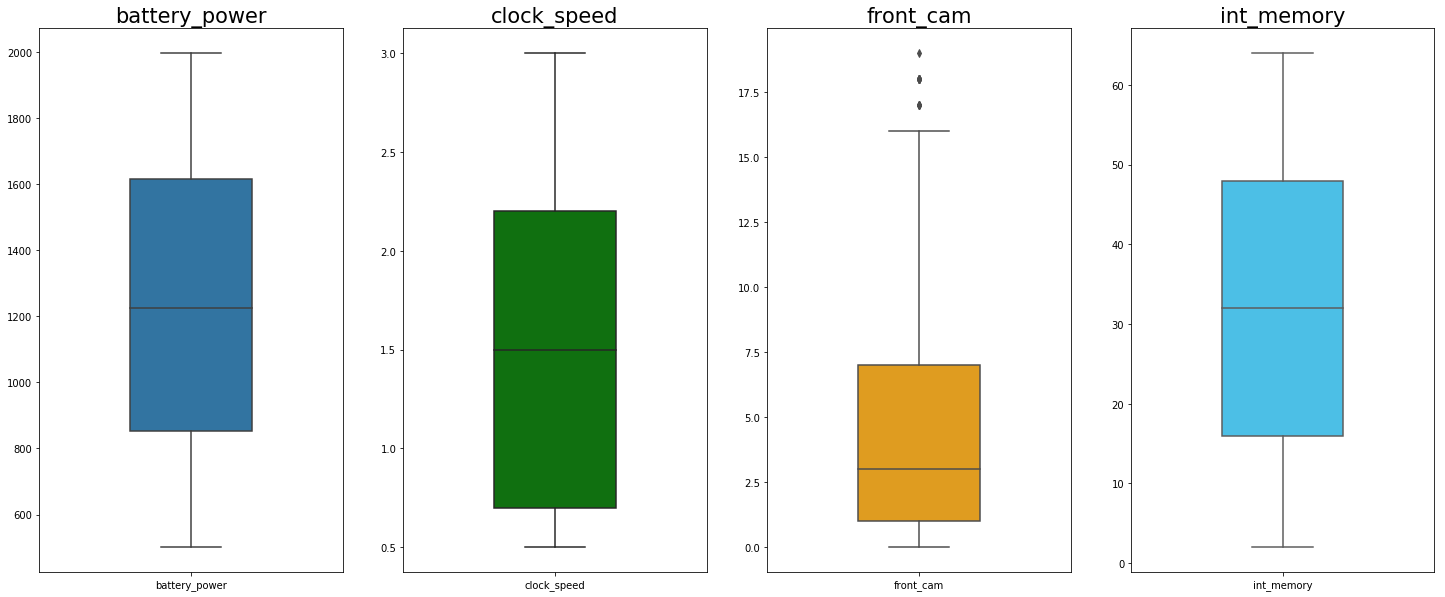

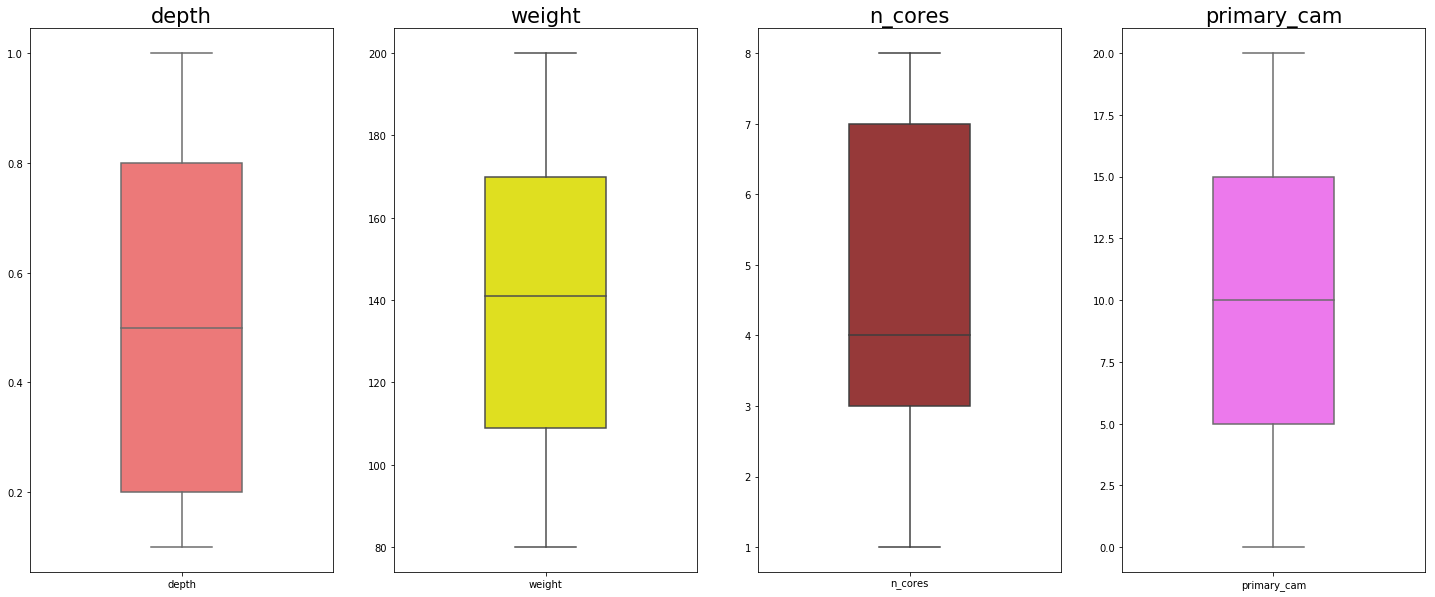

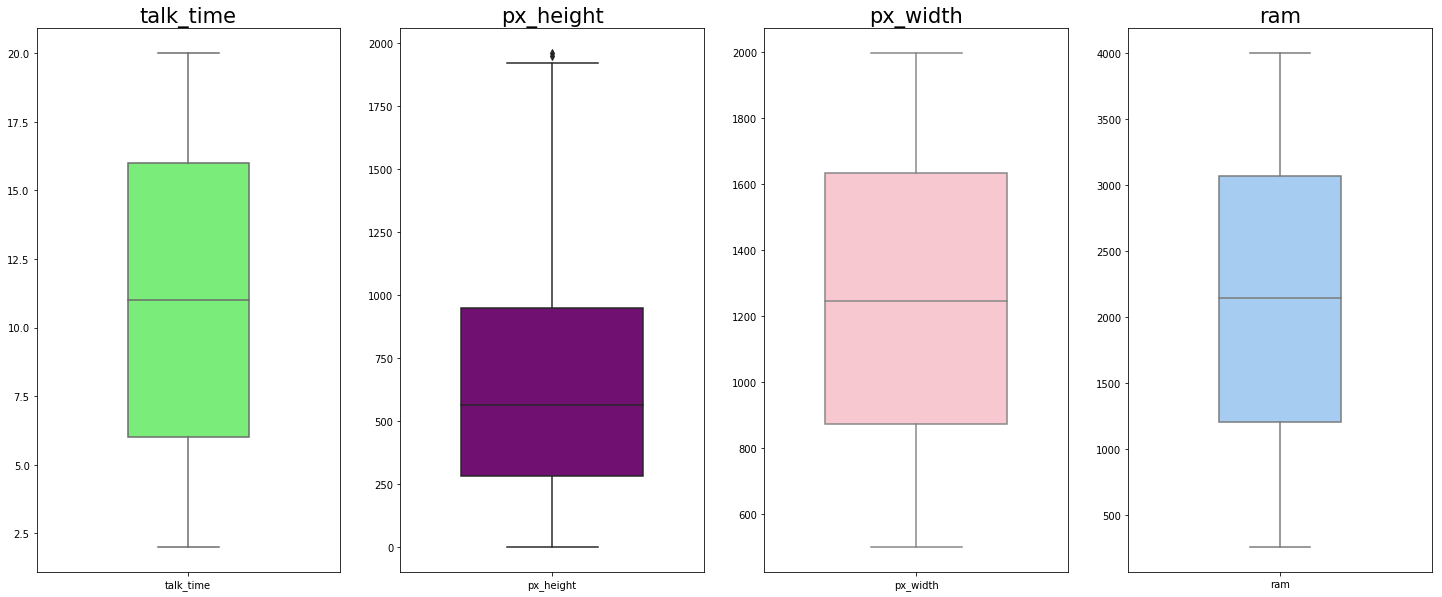

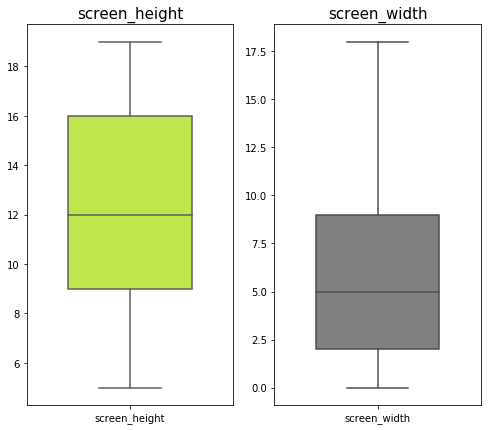

In [7]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

sb.boxplot(ax=ax1, data=df[['battery_power']], fliersize=5, width=0.4)
#sb.swarmplot(ax=ax1, data=df[['battery_power']], color=".2")
ax1.set_title('battery_power', fontsize=21)

sb.boxplot(ax=ax2, data=df[['clock_speed']], fliersize=5, width=0.4, color='green')
#sb.swarmplot(ax=ax2, data=df[['clock_speed']], color=".2")
ax2.set_title('clock_speed', fontsize=21)

sb.boxplot(ax=ax3, data=df[['front_cam']], fliersize=5, width=0.4, color='orange')
#sb.swarmplot(ax=ax3, data=df[['front_cam']], color=".2")
ax3.set_title('front_cam', fontsize=21)

sb.boxplot(ax=ax4, data=df[['int_memory']], fliersize=5, width=0.4, color='#33ccff')
#sb.swarmplot(ax=ax4, data=df[['int_memory']], color=".2")
ax4.set_title('int_memory', fontsize=21)

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

sb.boxplot(ax=ax1, data=df[['depth']], fliersize=5, width=0.4, color='#ff6666')
#sb.swarmplot(ax=ax1, data=df[['depth']], color=".2")
ax1.set_title('depth', fontsize=21)

sb.boxplot(ax=ax2, data=df[['weight']], fliersize=5, width=0.4, color='#ffff00')
#sb.swarmplot(ax=ax2, data=df[['weight']], color=".2")
ax2.set_title('weight', fontsize=21)

sb.boxplot(ax=ax3, data=df[['n_cores']], fliersize=5, width=0.4, color='brown')
#sb.swarmplot(ax=ax3, data=df[['n_cores']], color=".2")
ax3.set_title('n_cores', fontsize=21)

sb.boxplot(ax=ax4, data=df[['primary_cam']], fliersize=5, width=0.4, color='#ff66ff')
#sb.swarmplot(ax=ax4, data=df[['primary_cam']], color=".2")
ax4.set_title('primary_cam', fontsize=21)

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

sb.boxplot(ax=ax1, data=df[['talk_time']], fliersize=5, width=0.4, color='#66ff66')
#sb.swarmplot(ax=ax1, data=df[['talk_time']], color=".2")
ax1.set_title('talk_time', fontsize=21)

sb.boxplot(ax=ax2, data=df[['px_height']], fliersize=5, width=0.6, color='purple')
#sb.swarmplot(ax=ax2, data=df[['px_height']], color=".2")
ax2.set_title('px_height', fontsize=21)

sb.boxplot(ax=ax3, data=df[['px_width']], fliersize=5, width=0.6, color='pink')
#sb.swarmplot(ax=ax3, data=df[['px_width']], color=".2")
ax3.set_title('px_width', fontsize=21)

sb.boxplot(ax=ax4, data=df[['ram']], fliersize=5, width=0.4, color='#99ccff')
#sb.swarmplot(ax=ax4, data=df[['ram']], color=".2")
ax4.set_title('ram', fontsize=21)

fig = plt.figure(figsize=(17,7))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)

sb.boxplot(ax=ax1, data=df[['screen_height']], fliersize=5, width=0.6, color='#ccff33')
#sb.swarmplot(ax=ax1, data=df[['screen_height']], color=".2")
ax1.set_title('screen_height', fontsize=15)

sb.boxplot(ax=ax2, data=df[['screen_width']], fliersize=5, width=0.6, color='grey')
#sb.swarmplot(ax=ax2, data=df[['screen_width']], color=".2")
ax2.set_title('screen_width', fontsize=15)

There are no outliers except for the 'pixel_height' and 'front_camera' variables. The boxplot marks as outliers the points that exceed the whiskers, that mark the 5% and 95% percentiles.

A small subset of the features present an asymmetric value distribution; they are:

- Front camera
- Core number
- Pixel height
- Screen width

Their mean value do not coincide with their median and they have a high value of variance: it means that the points are likely to be pretty far from the expected values.
Their distribution is not centered in the mean value but is shifted higher or lower.

## 2.5 - Boxplot of values assumed by the features separately for each price category

I have plotted the distribution of values assumed by each numerical feature separately for each price category by means of a boxplot.

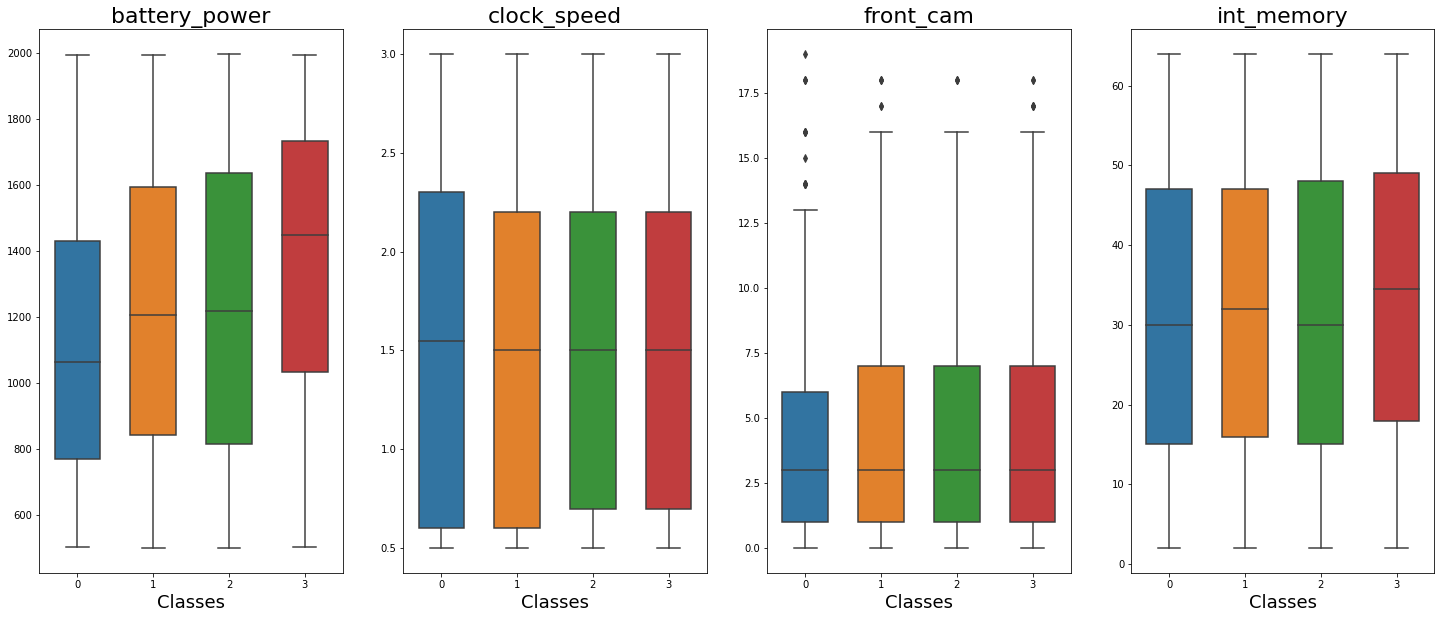

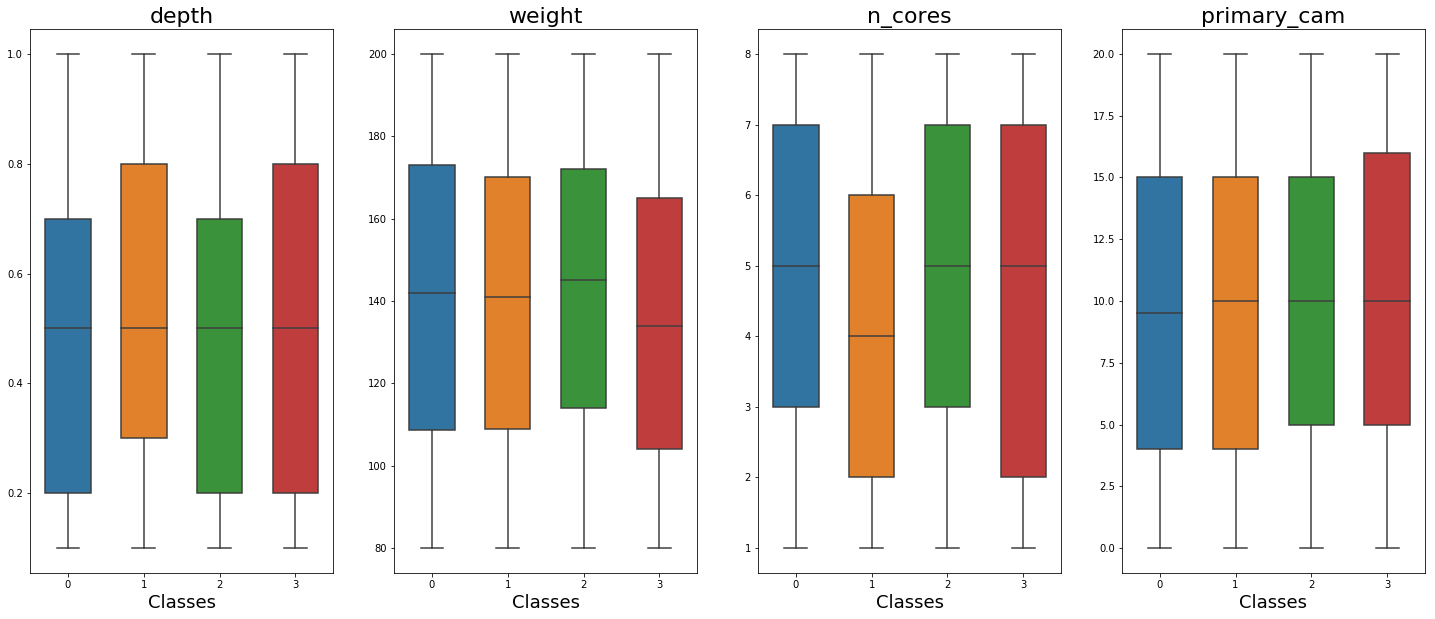

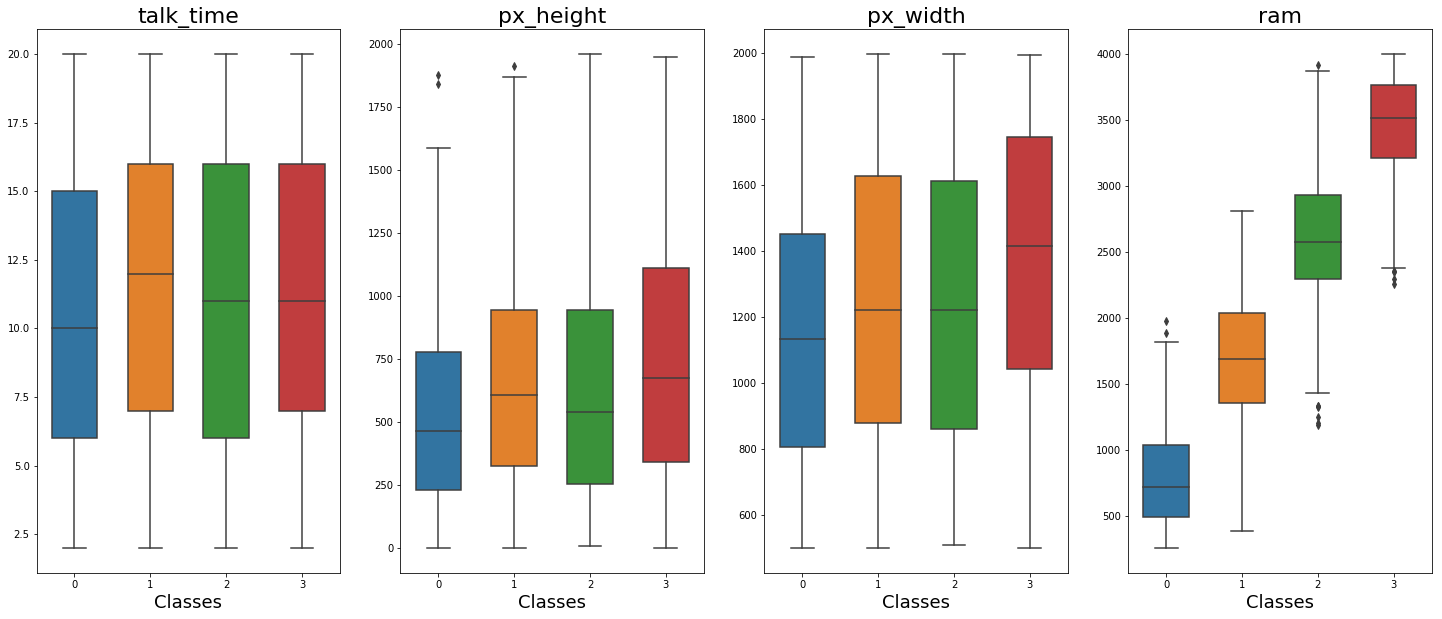

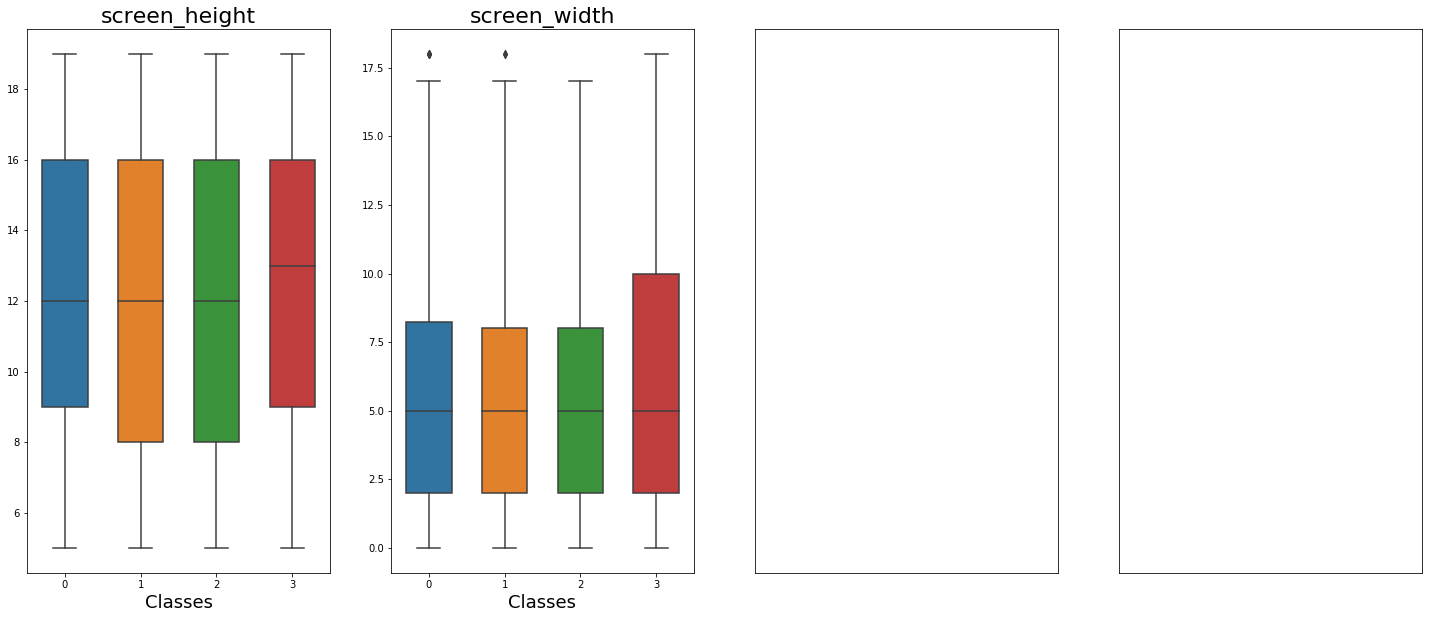

In [8]:
#print("Here I show for each class/label the values assumed by a numerical feature:")

def extract_feature_values(df, f):
    f0 = []
    f1 = []
    f2 = []
    f3 = []
    
    for index, row in df.iterrows():
        if(row['price_range'] == 0):
            f0.append(row[f])
        if(row['price_range'] == 1):
            f1.append(row[f])
        if(row['price_range'] == 2):
            f2.append(row[f])
        if(row['price_range'] == 3):
            f3.append(row[f])
    
    feature = []
    feature.append(f0)
    feature.append(f1)
    feature.append(f2)
    feature.append(f3)
    return feature

def plot_stat(string, d, ax1):
    #f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(8,8))
    ax1.set_title(string, fontsize=22)
    ax1.set_xlabel('Classes', fontsize=18)
    sb.boxplot(ax=ax1, data=d, fliersize=5, width=0.6)  

battery_power = extract_feature_values(df, 'battery_power')
clock_speed = extract_feature_values(df, 'clock_speed')
fc = extract_feature_values(df, 'front_cam')
int_memory = extract_feature_values(df, 'int_memory')
m_dep = extract_feature_values(df, 'depth')
mobile_wt = extract_feature_values(df, 'weight')
n_cores = extract_feature_values(df, 'n_cores')
pc = extract_feature_values(df, 'primary_cam')
talk_time = extract_feature_values(df, 'talk_time')
px_height = extract_feature_values(df, 'px_height')
px_width = extract_feature_values(df, 'px_width')
ram = extract_feature_values(df, 'ram')
sc_h = extract_feature_values(df, 'screen_height')
sc_w = extract_feature_values(df, 'screen_width')

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
plot_stat('battery_power', battery_power, ax1)
plot_stat('clock_speed', clock_speed, ax2)
plot_stat('front_cam', fc, ax3)
plot_stat('int_memory', int_memory, ax4)

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
plot_stat('depth', m_dep, ax1)
plot_stat('weight', mobile_wt, ax2)
plot_stat('n_cores', n_cores, ax3)
plot_stat('primary_cam', pc, ax4)

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
plot_stat('talk_time', talk_time, ax1)
plot_stat('px_height', px_height, ax2)
plot_stat('px_width', px_width, ax3)
plot_stat('ram', ram, ax4)

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)
plot_stat('screen_height', sc_h, ax1)
plot_stat('screen_width', sc_w, ax2)

These Box plots shows the values assumed by the features considering the whole dataset, separately for each price category. I can see the value distribution of each feature among all the classes.

### From these pictures some intresting information can be pointed out:

- Looking at the plot of the battery_power, it seems to be that the higher the price range and the more powerful is the battery of the device; 
- The same can be observed from the plot of the memory storage: an high value of memory storage is related to a high price category of the device;
- On the contrary,  the weight of the device tends to be lower if the device belongs to a high price category; this is usually true in real life: top-level mobile phones tend to be made as light as possible;
- The primary camera seems to have more MegaPixels in devices that belongs to the top price range;
- The screen resolution increases as the price range of the device grows (a positive trend is shown by the boxplot);
- The amount of RAM installed in the devices increases significantly as the price range if the devices grows;
- Finaly, a weird statistic is that high price range devices tend to have a wider screen;

As a summary, good features shows a positive and growing trend starting from class one (LOW) to class 3 (VERY-HIGH) and this is a reasonable consequence to the fact that devices with high quality specs are more expensive than devices with low quality specs.

## 2.6 - Correlation Matrix

I have plotted the correlation matrix of the features of the dataset. The matrix is symmetric and it shows the correlation degree that the pair of variables shares.
I used the Pearson Correlation coefficient to calculate the realtionship between the feature variables: it is a value that describes the mutual variability between two variables.

it is defined by: 
> $ \ \rho _{{XY}}={\frac  {\sigma _{{XY}}}{\sigma _{X}\sigma _{Y}}} $

Where $\ \sigma _{{XY}} $ is the covariance of $ X, Y $ and $ \ \sigma _{X},\sigma _{Y}$ are the two standad deviations.


Such correlation index is a number in the range $[-1 , 1]$:

- A high correlation value means that the two variables are positively correlated; hence, for every positive increase in one variable, there is a positive increase of a fixed proportion in the other.
- A low correlation value means that the two variables are negatively correlated; hence, for every positive increase in one variable, there is a negative increase of a fixed proportion in the other.
- A correlation value near to zero mean that the two variables can be considered as uncorrelated and so there is no relationship between the two variables at all.

/anaconda3/lib/python3.7/site-packages/seaborn/palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/anaconda3/lib/python3.7/site-packages/seaborn/palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


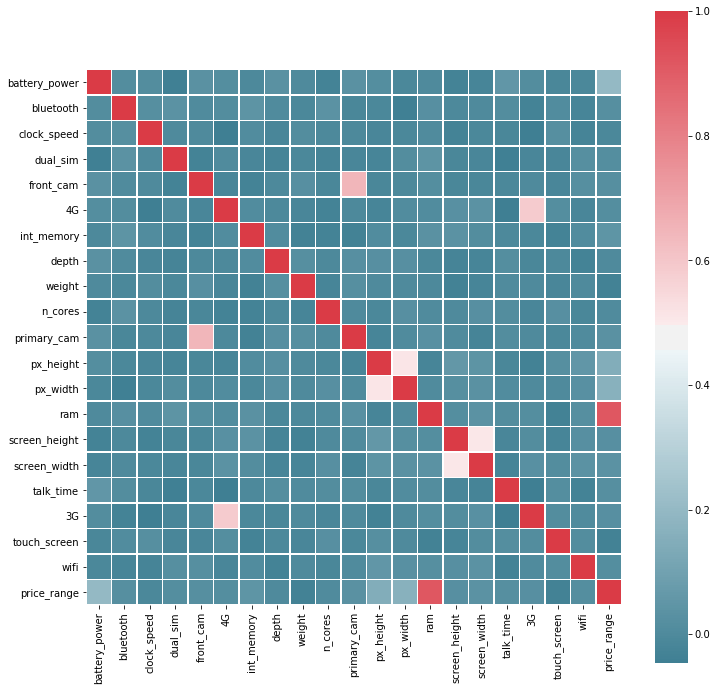

In [2]:
f, ax = plt.subplots(figsize=(12, 12)) 
corr = df.corr() 
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sb.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, linewidths=.5) 


## Correlations found in the dataset:
1. The first thing that come at sight is the high correlation value between the RAM and the price category: high values of RAM are positively correlated with a high price range. **It seems reasonable since expensive smartphones usually have a lot of RAM available.**

2. Also, the pixel resolution shows a slight correlation with the price category, it could mirror reality because usually top-level phones have a high density of pixels and so a powerful display (which is clearly costly). Furthermore, the pixel resolution height and width are positively correlated: if height resolution increases, width increases proportionally as well and it seems reasonable.

3. The dimensions of the screen (width and height measured in centimeters) are positively correlated; this is ok since the devices standard shape is rectangular and so it cannot happen that the height grows while the width remains inalterate.

4. Other significant relationships are the one that links 3G and 4G technologies and the one that exists between primary_cam and front_cam features.

# 3 - Dimensionality Reduction

## 3.1 - Feature manipulation
Since the screen size is described by means of two variables (screen_height and screen_width) I choose to merge them in a unique variable that is the **diagonal of the screen**. To do that, I simply applied the Pythagoras Theorem and calculate the diagonal starting from the height and the width (it is possible thanks to the rectangular shape of mobile phones).

This way I have reduced by one the dimensionality of the dataset (20 --> 19 features).

In [3]:
def pythagoras(a,b):
    value = round(math.sqrt(a*a + b*b), 2)
    return value

height = df[["screen_height"]].values
width = df[["screen_width"]].values

diag = np.zeros(num_samples)

reduced_df = df
reduced_df.drop(labels=["screen_height", "screen_width"], axis="columns", inplace=True)

i = 0
for h, w in zip(height, width):
    diag[i] = pythagoras(h, w)
    i += 1

reduced_df.insert(14, "screen_diagonal", diag)

X = df[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam', '4G', 'int_memory', 'depth', 
                               'weight', 'n_cores', 'primary_cam', 'talk_time', 'px_height', 'px_width',
                               'ram', 'screen_diagonal', '3G',
                              'touch_screen', 'wifi']].values

num_features = 19   # Number of Columns/Features
feature_names = df[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam', '4G', 'int_memory', 'depth', 
                               'weight', 'n_cores', 'primary_cam', 'talk_time', 'px_height', 'px_width',
                               'ram', 'screen_diagonal', '3G',
                              'touch_screen', 'wifi']].columns

#Only Numerical data:
df_numerical = df[['battery_power', 'clock_speed', 'front_cam', 'int_memory', 'depth', 
                               'weight', 'n_cores', 'primary_cam', 'talk_time', 'px_height', 'px_width',
                               'ram', 'screen_diagonal']]

X_numerical = df_numerical.values
X_numerical_std = ((X_numerical-X_numerical.mean())/X_numerical.std()) #Normalized version of the matrix
feature_names_numerical = df_numerical.columns
numerical_features = 13

##  3.2 - PCA

The Principal Component Analysis is an unsupervised dimensionality reduction algorithm that allows to summarize a large feature set into a smaller number of features that together explains as much variability as possible of the original dataset. In other words, PCA finds a lower-dimensional representation of data that keeps as much information as possible.<br>
The idea behind PCA is that not all the dimensions of the original dataset are equally interesting; PCA simply looks for a small number of features which are as much interesting as possible and it discards the others. The concept of interesting is related to the amount of variance explained.

The so-called principal components are nothing but the directions in the space that contains the maximum variance of the considered dataset; PCA finds a number of PC (directions) which is smaller than the number of the original features and then projects data into the new smaller-dimensional subspace.
These directions are orthogonal each other and they are as close as possible to the cloud of data.

More in detail, the first PC of a set of features ${X_1,X_2, \dots , X_p}$, is the normalized linear combination of the features: $Z_1 = \beta_{{11}}X_1 + \beta_{{21}}X_2 + \dots + \beta_{{p1}}X_p $ that has the **largest variance**. The beta coefficients are the loadings of the first PC and together they constitute the PC Loading vector $\beta_1 = \{\beta_{{11}}, \beta_{{21}}, \dots , \beta_{{p1}}\}^T $. 

> *Normalized means that $\sum_{j=0}^{p} \beta_{{j1}}^2 = 1$*

The second PC   $ Z_2 = \beta_{{12}}X_1 + \beta_{{22}}X_2 + ... + \beta_{{p2}}X_p $ is the linear combination of ${X_1,X_2, ... , X_p}$ that has the maximal variance in the residual space, that is out of all linear combinations that are **uncorrelated** with $ Z_1 $. And so on and so forth for all the other PCs.
>*Remind that putting the constraint that $ Z_2 $ is uncorrelated with $ Z_1 $ is equivalent to constraining that the direction $ \beta_1 $ is orthgonal with the direction $ \beta_2 $.*

PCA is unsupervised because there is *no associated response (Y) needed*.

PCA is also a great tool for **data visualization**: selecting the first two PC, which are the most informative and representative, you can produce a scatter plot of a much higher-dimensional dataset which cannot be visualized otherwise.<br><br>

If you want to apply PCA and reduce the dimensionality of a dataset $D$ with $n$ features to a new one with only $k$ features, these steps are required:

1. Standardize the data
2. Build the Covariance matrix $\Sigma$ and decompose it into Eigenvectors and Eigenvalues;
3. Sort the Eigenvalues in decreasing order to obtain a ranking of the correspondent Eigenvectors;
4. Select top $k$ eigenvctors according to the ranking of the eigenvalues; $k$ will be the new dimensionality of the reduced dataset;
5. build a new projection matrix $W$ using the selected top $k$ eigenvectors;
6. Transform the initial dataset $D$ by multiplying it with $W$.
> $D_{transformed} = D*W$

<BarContainer object of 13 artists>

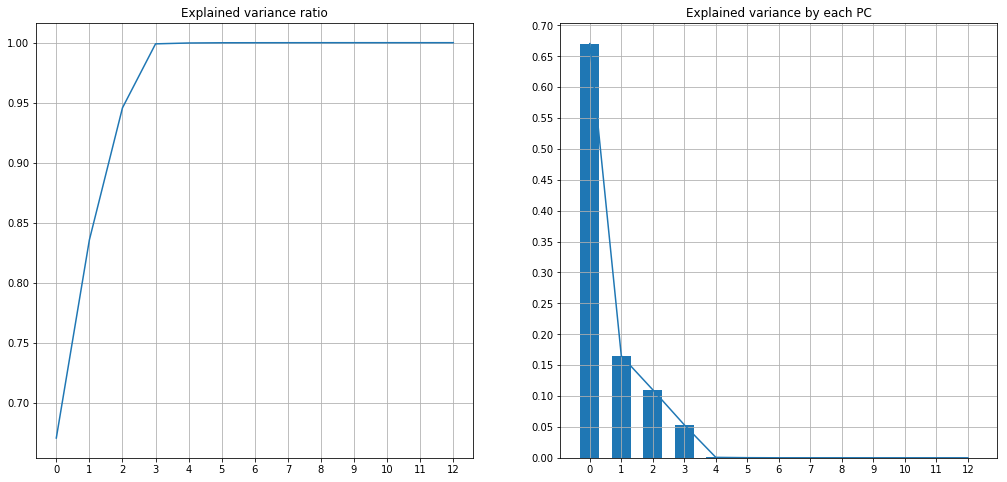

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X_numerical)
X_pca_std = pca.fit_transform(X_numerical_std)
X_pca_pruned = X_pca[:, 0:4]
X_pca_pruned_std = X_pca_std[:, 0:4]
df_pca = pd.DataFrame(X_pca_pruned_std)
df_pca.index.name = 'Samples'
df_pca.columns.name = 'PC'

fig = plt.figure(figsize=(36,8))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)

ax1.set_title("Explained variance ratio")
ax1.grid()
ax1.set_yticks(np.arange(0, 1.1, 0.05))
ax1.set_xticks(np.arange(0, 15, 1))
ax1.plot(pca.explained_variance_ratio_.cumsum())

ax2.set_title("Explained variance by each PC")
ax2.grid()
ax2.set_yticks(np.arange(0, 1.1, 0.05))
ax2.set_xticks(np.arange(0, 15, 1))
ax2.plot(pca.explained_variance_ratio_)
ax2.bar(np.arange(13), pca.explained_variance_ratio_, width=0.6, linewidth=10)  

We can see from the plots above that **the first 4 PC explains the 100% of the total variance of data**, hence from the 5th PC on, the variance explained is zero.
I can reduce the dimensionality of my dataset to 4 features that would coincide with the first 4 PC.

Hence, the size of the dataset is reduced from $ 2000x12 $ to $ 2000x4 $.

The following table shows the pruned dataset.

In [7]:
print("Dataset made by the first 4 Principal Components:")
pd.set_option('display.max_rows', 20)
df_pca

Dataset made by the first 4 Principal Components:


PC,0,1,2,3
Samples,,,,
0,0.567048,-1.047966,-0.513679,0.073266
1,0.665010,0.917376,-0.310298,0.452913
2,0.623323,1.006028,-0.895563,-0.150015
3,0.842575,1.026767,-0.830672,-0.040036
4,-0.946824,0.503453,0.778334,-0.516690
5,-1.396626,0.707059,0.806715,0.094987
6,1.445824,-0.446547,0.771686,0.030193
7,-1.874172,-0.222487,0.942272,0.066829
8,-1.347255,-0.630160,0.282685,-0.142795


## 3.2.1 - Data visualization with PCA

In the following plot I wanted to represent the data in 2D using PCA result: I selected the first two principal components that are the most informative and which explain about the $ 83$% of the total variance and I displayed a scatter plot showing also the class distributions with different colors.

The dataset is reduced from $ 2000x20 $ to $ 2000x2 $.

The class distributions are a little overlapped but each class can be easily distinguished; it seems that points belonging to low price categories tend to lie on the left side of the picture while high price categories points lie on the right side.

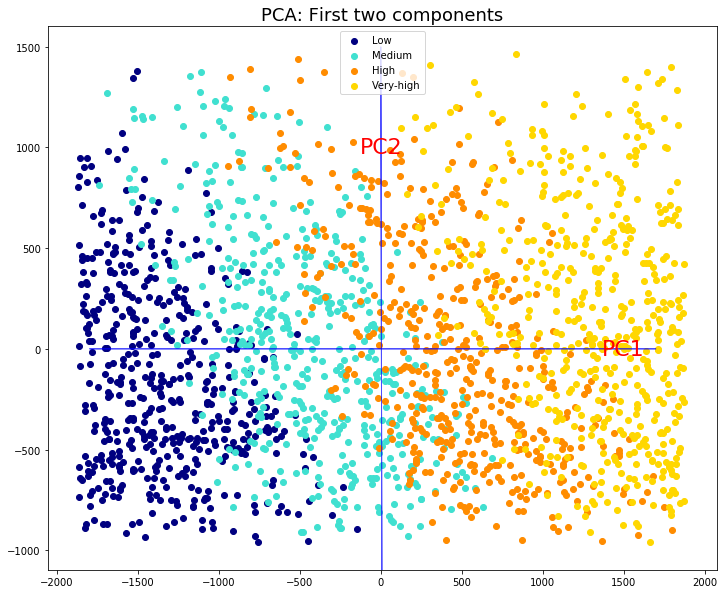

In [8]:
def plot_data(colors, X, Y, label_names, string):

    plt.figure(figsize=(12, 10))
    plt.title(string, fontsize=18)

    for color, i, target_name in zip(colors, [0, 1, 2, 3], label_names):
        plt.scatter(get_data_from_label(X[:, 0], Y, i), get_data_from_label(X[:, 1], Y, i), color=color,
                    label=target_name)

    plt.legend(scatterpoints=1)
    plt.arrow(-1800, 0, 3500, 0, color = 'b', alpha = 0.7)
    plt.text(1500, 0, "PC1", color = 'r',ha = 'center', va = 'center', fontsize=22)
    plt.arrow(0, 1500, 2500, -1000000, color = 'b', alpha = 0.7)
    plt.text(0, 1000, "PC2", color = 'r',ha = 'center', va = 'center', fontsize=22)


def get_data_from_label(X, Y, label):
    z = []
    for x, y in zip(X, Y):
        if y == label:
            z.append(x)
    return z

plot_data(colors, X_pca, Y, label_names, "PCA: First two components")

## 3.2.2 - PCA Loading Vectors

As I explained before in $3.2$, each PC is a normalized linear combination of the original features.
The coefficients $\beta_i$ clustered together constitute the PCi Loading vector: it defines a direction in the feature space along which the data vary the most. Of course, each PC after the first and most informative, has a loading vector that points in a direction in the residual feature space which is orthogonal with respect to all the other PC directions.

In the next, I have displayed the values of the loading vectors for each PC.

In [ ]:
print('Principal Components Loading Vectors:')

comp = pca.components_ *10000

d = {'battery_power': comp[:,0], 'clock_speed': comp[:,1], 'front_cam': comp[:,2],
    'int_memory': comp[:,3], 'depth': comp[:,4], 'weight': comp[:,5],
    'n_cores': comp[:,6], 'primary_cam': comp[:,7], 'talk_time': comp[:,8],
    'px_height': comp[:,9], 'px_width': comp[:,10], 'ram': comp[:,11],
    'screen_diagonal': comp[:,12]}

dataframe = pd.DataFrame(data=d)
dataframe.index.name = 'PC'
dataframe.columns.name = 'Features'
pd.set_option("display.precision",4)
display(dataframe)


Principal Components Loading Vectors:


Features,battery_power,clock_speed,front_cam,int_memory,depth,weight,n_cores,primary_cam,talk_time,px_height,px_width,ram,screen_diagonal
PC,,,,,,,,,,,,,
0,-3.4720,0.0263,0.6056,5.4824,-0.0253,-0.8443,0.1035,1.6242,0.5469,-99.0307,9.6477,9999.5026,1.3231
1,103.8844,-0.2087,-0.6733,0.6848,0.1515,0.3912,0.3924,-0.9088,-0.2090,7250.3617,6886.0137,65.1959,5.1128
2,9994.4249,0.2144,3.2936,-1.4729,0.2212,1.5007,-1.5888,4.2869,6.4816,143.0755,-301.4699,5.1782,-3.2885
3,317.1326,0.1396,0.8235,-11.9088,0.0065,-0.8096,2.2755,4.6386,3.5029,-6884.8983,7245.1195,-75.0590,-5.5436
4,1.5726,-2.8300,-30.2938,237.3558,-1.7585,-9996.9379,12.0435,-34.4442,-9.7977,0.6113,-0.1599,-0.9663,50.3442
5,1.9186,3.2341,-78.9924,9995.6097,1.2935,238.3790,-37.0190,-128.1073,-7.8351,-8.7617,8.1579,-5.5385,81.7821
6,-5.5662,-5.9376,5160.3048,151.8747,7.9218,-41.8852,-20.5519,8563.0560,135.9489,3.7154,-2.1561,-1.7554,-38.1025
7,6.8693,14.3997,218.2391,-16.8585,-9.5715,14.9873,-67.7811,31.8654,-9912.9361,-3.3826,2.2225,0.3302,1295.9894
8,2.5120,-39.5037,-113.2887,-80.7076,-12.4435,46.8425,53.9206,93.6235,1293.7585,-6.9833,0.0090,-1.4115,9914.1919


## 3.2.3 - PCA Biplot: Plot of the first two principal components and Loading vectors

The figure below shows the scatter plot of the first two Principal Components and the first two PC loading vectors (Blue lines).

- As the plot shows, the first loading vector places most of its weight on **Ram** and zero on all the others, therefore this component represents the Ram-level of the device.

- I reckon that the second loading vector has approximately the same weight on **Screen_height** and **Screen_width** while much less on the others. Hence, this component corresponds to a measure of the physical screen dimensions of the mobile phone;

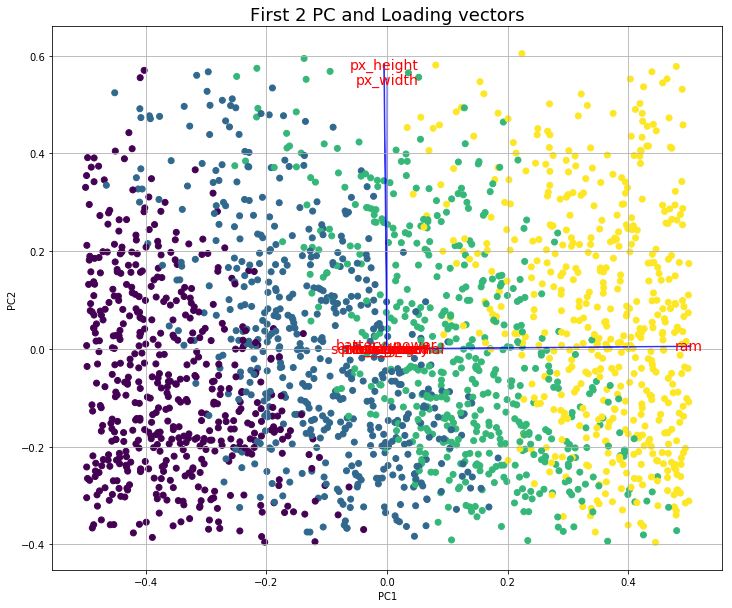

In [ ]:
def myplot(score,coeff,labels, string):
    
    fig = plt.figure(figsize=(12, 10))
    
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = Y)
    for i in np.arange(n):
        plt.arrow(0, 0, coeff[0, i]*0.5, coeff[1, i]*0.8, color = 'b', alpha = 0.7)
        if i == 14:
            break
        plt.text(coeff[0, i]*0.5, coeff[1, i]*0.8, labels[i], color = 'r',
                 ha = 'center', va = 'center', fontsize=14)
    
    plt.text(coeff[0, i]*0.5, coeff[1, i]*0.8, labels[11], color = 'r',
                 ha = 'center', va = 'center', fontsize=14)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title(string, fontsize=18)
    plt.grid()   
    
#Used only the first 2 PCs.
myplot(X_pca[:,0:2], pca.components_[0:2, :], feature_names_numerical, "First 2 PC and Loading vectors")
plt.show()

## 3.2.4 - Amplification of the loading vectors for visualization:

Since there is a huge scale difference in the loading vectors, I have decided to zoom the center of the previous plot to better visualize the overlapped loading vectors of the other features.

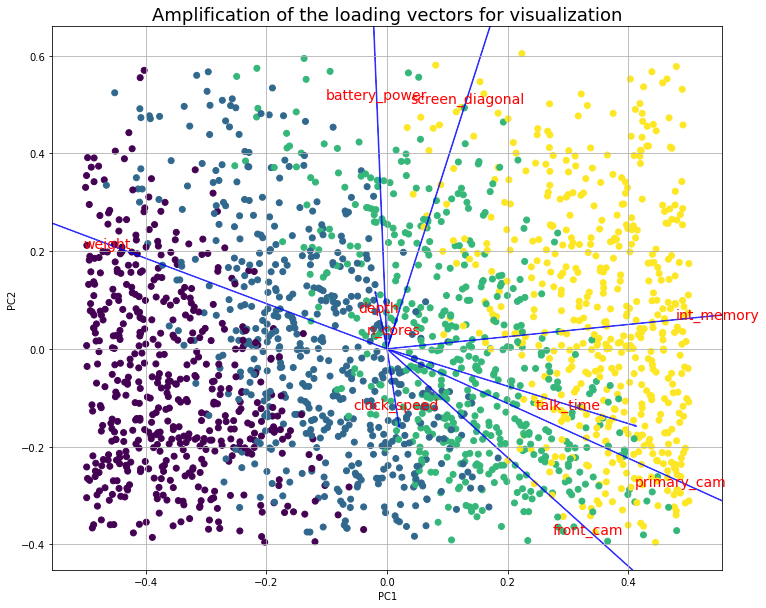

In [ ]:
def myplot_adapted(score,coeff,labels, string):
    
    fig = plt.figure(figsize=(12, 10))
    
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = Y)
    for i in np.arange(0,9):
        if i == 3:
            plt.arrow(0, 0, coeff[0, i]*1500, coeff[1, i]*1500, color = 'b', alpha = 0.7)
            plt.text(coeff[0, i]*1000, coeff[1, i]*1000, labels[i], color = 'r',
                 ha = 'center', va = 'center', fontsize=14)
        elif i == 6:
            plt.arrow(0, 0, coeff[0, i]*1500, coeff[1, i]*1500, color = 'b', alpha = 0.7)
            plt.text(coeff[0, i]*1000, coeff[1, i]*1000, labels[i], color = 'r',
                 ha = 'center', va = 'center', fontsize=14)
        elif i == 0:
            plt.arrow(0, 0, coeff[0, i]*65, coeff[1, i]*65, color = 'b', alpha = 0.7)
            plt.text(coeff[0, i]*50, coeff[1, i]*50, labels[i], color = 'r',
                 ha = 'center', va = 'center', fontsize=14)
        elif i == 7:
            plt.arrow(0, 0, coeff[0, i]*3500, coeff[1, i]*3500, color = 'b', alpha = 0.7)
            plt.text(coeff[0, i]*3000, coeff[1, i]*3000, labels[i], color = 'r',
                 ha = 'center', va = 'center', fontsize=14)
        else:
            plt.arrow(0, 0, coeff[0, i]*7500, coeff[1, i]*7500, color = 'b', alpha = 0.7)
            plt.text(coeff[0, i]*5500, coeff[1, i]*5500, labels[i], color = 'r',
                     ha = 'center', va = 'center', fontsize=14)
    
    plt.arrow(0, 0, coeff[0, 12]*1500, coeff[1, 12]*1500, color = 'b', alpha = 0.7)
    plt.text(coeff[0, 12]*1000, coeff[1, 12]*1000, labels[12], color = 'r',
                 ha = 'center', va = 'center', fontsize=14)
        
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title(string, fontsize=18)
    plt.grid()
    
#Used only the first 2 PCs.
myplot_adapted(X_pca[:,0:2], pca.components_[0:2, :], feature_names_numerical,
               "Amplification of the loading vectors for visualization")
plt.show()

## 3.3 - Feature selection Exploiting Random Forest classifier

As the section title says, I have exploited the Random Forest classifier, fitted on the data, to extract a measure of "*importance*" related to each feature; the algorithm assigns a value of importance to each feature: the higher the value and the more important the algorithm retains that feature in the classification task.

In scikit-learn, the importance coefficient is called *“gini importance”* or *“mean decrease impurity”* and is defined as the total decrease in node impurity weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node) averaged over all trees of the ensemble.

More in detail:<br>
> Evaluate the importance of a variable $X_m$ for predicting $y$ can be done by adding up the weighted impurity decreases $p(t)\Delta i(s_t , t)$ for all nodes $t$ where $X_m$ is used, averaged over all $N_T$ trees in the forest.<br><br> **Impurity formula**:<br><br>
$Imp(X_m) = \frac{1}{N_T} 􏰁\sum_T \sum_{t \in T : v(s_t) = X_m} p(t)\Delta i(s_t , t)$<br><br>
where $p(t)$ is the proportion $\frac{N_T}{N}$ of samples reaching t and $v(s_t)$ is the variable used in split $s_t$.
<br><br>

**Steps followed**:
1. Start with an empty dataset;
2. *Each iteration* I add the most important feature according to the feature importance metric of the Random Forest, from the one with the highest importance to the lowest (incrementing the dataset's columns by 1); then I train a new Random Forest classifer using a 10 split [K-Fold Cross-Validation](#K-Fold-Cross-Validation), and I evaluate its performances looking at the [F-Measure](#F-Measure);
3. Select the number of feature that provides the best trade-off between the number of feature used and the performance obtained.<br><br>

In section [4.2 - Random Forest](#4.2---Random-Forest) I will explain more in detail the Random Forest classifier and also the Gini Index in [Purity coefficient: GINI](#Purity-coefficient:-GINI)

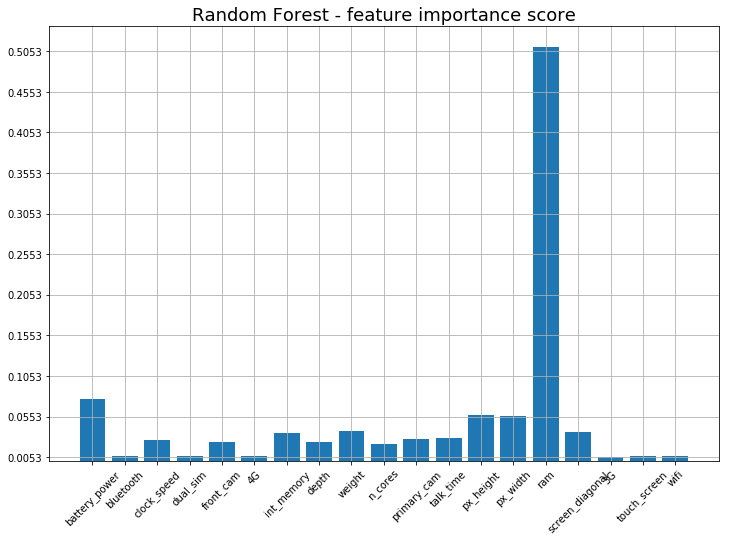

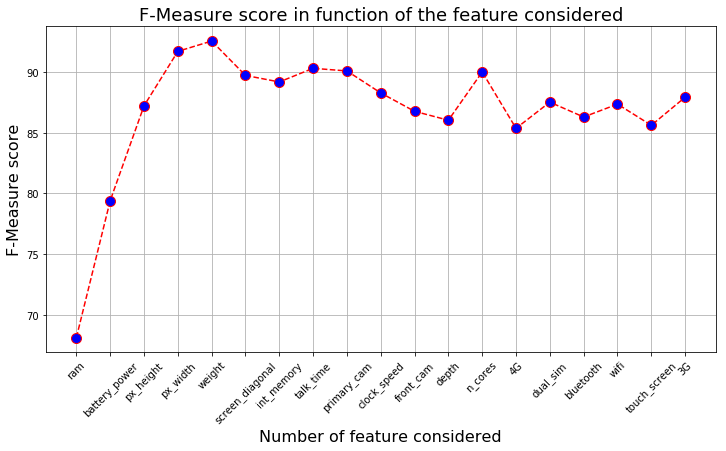

In [9]:
def do_FS_RandomForestBased(X, y, num_samples, num_features, feature_names):
    rf = RandomForestClassifier(n_estimators=150, random_state=0)
    rf.fit(X, y)

    importances = rf.feature_importances_
    
    # Plot histogram of feature importances
    plt.figure(figsize=(12,8))
    plt.title("Random Forest - feature importance score", fontsize=18)
    plt.yticks(np.arange(min(importances), max(importances), 0.05))
    plt.xticks(np.arange(num_features), feature_names)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.bar(np.arange(num_features), importances)
    
    imp_ordered = importances.tolist()
    imp_ordered = sorted(imp_ordered, reverse=True)
    
    importance_list = {} 

    #creating a dictionary to couple features to their importance sorted by decreasing importance
    counted = []
    for i in range(num_features):
        maximum = 0 
        index = -1
        for j, x in enumerate(importances):
            if x > maximum and j not in counted:
                maximum = x
                index = j
        
        counted.append(index)
        string = feature_names[index]
        importance_list[string] = index

    X_important = np.zeros((num_samples, 1))
    
    results = []
    acc_results = []
    best_feat = []
    num_col = 0
    feat = []
    best_score = 0
    
    #Add a feature at a time, in order of importance and test the model
    for val, name in zip(importance_list.values(), importance_list.keys()):
        
        if val == 11:
            for i, x in enumerate(X[:, val]):
                X_important[i, 0] = x

        X_important = np.c_[X_important, X[:, val].reshape((2000, 1))]
        feat.append(feature_names[val])
        clf = RandomForestClassifier(n_estimators=250) 
        
        r = np.random.randint(1, 50)
        X_train, X_test, Y_train, Y_test = train_test_split(X_important, y, test_size=0.3, random_state=r, shuffle=True)
        
        kf = KFold(n_splits=10, shuffle=True)
        score = []
        acc = []

        for train_index, test_index in kf.split(X_train, Y_train):
            xtrain, xtest = X_train[train_index], X_train[test_index]
            ytrain, ytest = Y_train[train_index], Y_train[test_index]

            clf.fit(xtrain, ytrain)
            #predictions = clf.predict(xtest)
            #score.append(f1_score(ytest, predictions, average='weighted') * 100)
            #acc.append(accuracy_score(ytest, predictions) * 100)

        #a = sum(acc)/float(len(acc))
        #acc_results.append(a)

        #res = sum(score)/float(len(score))
        #results.append(res)
        
        predictions = clf.predict(X_test)
        results.append(f1_score(Y_test, predictions, average='weighted') * 100)
        acc_results.append(accuracy_score(Y_test, predictions) * 100)
        
        #If the resultant F1-measure is higher than the current MAX, update the max and save the features 
        #if res > best_score: 
            #best_feat = feat
            #best_score = res
    
    plt.figure(figsize=(12, 6))  
    plt.plot(range(num_features), results, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
    plt.title("F-Measure score in function of the feature considered", fontsize=18) 
    plt.xlabel("Number of feature considered", fontsize=16) 
    plt.xticks(np.arange(num_features), importance_list.keys())
    plt.xticks(rotation=45)
    plt.grid()
    plt.ylabel('F-Measure score', fontsize=16)
    
    return X_important[:, 0:5]
    
X_reduced_RF = do_FS_RandomForestBased(X, Y, num_samples, num_features, feature_names)
#X_reduced_RF = do_FS_RandomForestBased(X_numerical, Y, num_samples, numerical_features, feature_names_numerical)

## Comments about the obtained results:

The plot above shows that the trend assumed by the performance of the model as I progresively add one feature at each iteration. At first, when I add the most important features according to the Random forest *Gini Importance*, the F-Measure grows and so the model increase its effectiveness in recognizing the classes but from the 5th feature on, the performances slowly decrese even if in a non-linear way. <br>
Therefore I think that a reasonable choice could be to keep the first 5 features that have been added because they are a good trade off between the number of features I keep and the performance obtained. The resultant pruned datset will have a shape of (2000, 5), keeping the 5 most important features according to the Random Forest metric.

I know that there are many other ways to combine the features which might give better results, but I retained an exaustive exploration of the entire space of the solutions out of the scope of this analysis.

# 4 - Classification

In this section I have explained the working principles of some of the classification algorithms we have studied in the lectures and I have applied them on the "cleaned" dataset, trying to understand what algorithm works better in classifying a sample in the correct price category.
<br><br>
For each classifier employes I have followed these steps:<br>
1. As a preliminary step, I have performed a **search for the best setting of the hyperparameters of each algorithm**: I have trained several different models created with a different parameter value and I have picked up the setting that give the best outcome according to the F-Measure.

2. For each algorithm I have **split the dataset into train and test** set with proportions 70% training and 30% test: the training one is employed to build the model while the test one to evaluate its performance.<br>
I have chosen to take track of the *accuracy, precision, recall and F-Measure* of the model.

3. I have performed a **K-fold cross-validation of the training set** with K = 10 in order to create a robust model as little biased as possible. Once the model is trained, I evaluate once more its performances on the test set I took apart before.

4. I repeated step *2 and 3* using a dataset which has been reducted with one of the techniques described before (PCA and Random Forest-based feature selection).

> The classification algorithms that I have implemented are:
- **Decision Tree**
- **Random Forest**
- **Support Vector Machine**
- **K Nearest Neighbor**

### Evaluation parameters: Confusion Matrix, Accuracy, Precision, Recall and F-Measure

#### Confusion Matrix
The confusion matrix is a matrix that helps in describing the performance of a classification algorithm on a test set for which the true labels are known. It gives a summary of the classifier predictions by showing the count of both correct and wrong predictions separately for each class.<br>
On the columns we find the ground truth (correct labels) while on the rows we find the model's predictions.
For a simple binary classification, there are four main classes of predictions:
- True Positive (TP) : Observation is positive, and is predicted to be positive.
- False Negative (FN) : Observation is positive, but is predicted negative.
- True Negative (TN) : Observation is negative, and is predicted to be negative.
- False Positive (FP) : Observation is negative, but is predicted positive.

<img src="Images/confusionmatrix.png">

#### Accuracy
>It is defined by the relation:  $\frac{TP + TN}{TP + TN + FP + FN}$<br>
It gives an estimate of how many errors the model has done, assuming an equal cost for each error.

#### Precision
> It is defined by the relation:  $\frac{TP}{TP + FP}$<br>
It tells how many samples that the model classified to a certain class effectively belong to that class. It gives an estimate of the precision of the decisions the model makes.

#### Recall
> It is defined by the relation:  $\frac{TP}{TP + FN}$<br>
The recall can be defined as the ratio of the total number of correctly classified positive examples divided by the total number of positive examples. A high value of Recall indicates how much the considered class is correctly recognized by the model. In other words, it tells how many samples of a certain class have been correctly classified to that class.

#### F-Measure
> It is defined by the relation:  $\frac{2*Recall*Precision}{Recall+Precision}$<br>
It is a sort of trade off that take into account both Recall and Precision; it gives a measure of how good is the model at recognizing a certain class and how precise the model's decision are.

### K-Fold Cross-Validation
K-fold Cross-Validation technique consists in dividing the training set in K distinct folds, all containing the exact number of samples, and then, at each step of the training phase, the $ Kth $ portion becomes the validation set while all the other parts togeher constitute the training set.<br>
This process is repeated K times, selecting each time a different portion as validation set.
Each iteration the model is updated and some statistics about its performance are computed; 
At the end of the training process I have calculated the average of the above-mentioned measures, obtaining a score of how good the model has been on the training set.

Notice that the Cross-Validation technique is much more resistant than a simple division in Train and Test set: through many iterations, it allows to create a number of different samples of the dataset which are used as training set and which avoids to provide the model a biased portion of data which may not be a good representation of the dataset. In other words, providing the model K different training sets allows it to better understand the characteristics of the data improving its classification capabilities.

<img src="Images/crossvalidation.jpg">

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def Classifier(X_t, y, clf, string):
    r = np.random.randint(1, 50)
    X_train, X_test, Y_train, Y_test = train_test_split(X_t, y, test_size=0.3, random_state=r, shuffle=True)
    
    splits = 10
    kf = KFold(n_splits=splits, shuffle=True)
    score = np.zeros((4, 2))
    
    for train_index, test_index in kf.split(X_train, Y_train):
        xtrain, xtest = X_train[train_index], X_train[test_index]
        ytrain, ytest = Y_train[train_index], Y_train[test_index]
        
        clf.fit(xtrain, ytrain)
        predictions = clf.predict(xtest)
        score[0, 0] += accuracy_score(ytest, predictions) * 100
        score[1, 0] += f1_score(ytest, predictions, average='weighted') * 100
        score[2, 0] += precision_score(ytest, predictions, average='weighted') * 100
        score[3, 0] += recall_score(ytest, predictions, average='weighted') * 100
        
    score[:, 0] = score[:, 0]/splits
    for i, val in enumerate(score[:, 0]):
        score[i,0] = round(val, 2)
    
    predictions = clf.predict(X_test)
    score[0, 1] = round(accuracy_score(Y_test, predictions) * 100, 2)
    score[1, 1] = round(f1_score(Y_test, predictions, average='weighted') * 100, 2)
    score[2, 1] = round(precision_score(Y_test, predictions, average='weighted') * 100, 2)
    score[3, 1] = round(recall_score(Y_test, predictions, average='weighted') * 100, 2)

    print(string)
    s = {'Train_Score': score[:, 0], 'Test_Score': score[:, 1]}
    st = pd.DataFrame(data=s, index=['Accuracy', 'F1-Score', 'Precison', 'Recall'])
    display(st)
    
    cm = confusion_matrix(Y_test, predictions)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    
    for i, val in enumerate(recall):
        recall[i] = round(val, 2)
        
    for i, val in enumerate(precision):
        precision[i] = round(val, 2)
    
    d = {'Recall': recall, 'Precision': precision}
    stat = pd.DataFrame(data=d, index=label_names)
    print("\n\nRecall and precision scores for each class")
    display(stat)
    
    plot_confusion_matrix(cm, classes=label_names, title='Confusion Matrix')
    
    return score[:, 1] #Return test scores

def best_parameters_search(x, array, X, Y, string, xlab):
    score = []
    acc = []
    best_score = 0 
    r = np.random.randint(1, 50)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=r, shuffle=True)

    for i in array:  
        if x == 0:
            clf = DecisionTreeClassifier(
                criterion = "gini", random_state = 100, max_depth=i)
        elif x == 1:
            clf = RandomForestClassifier(n_estimators=i)
        elif x == 2:
            clf = LinearSVC(C=i, dual=False)
        elif x == 3:
            clf = KNeighborsClassifier(n_neighbors=i)
        
        clf.fit(X_train, Y_train)
        pred_i = clf.predict(X_test)
        
        f1 = f1_score(Y_test, pred_i, average='weighted') * 100
        acc.append(accuracy_score(Y_test, pred_i) * 100)
        
        score.append(f1)
        if f1 > best_score:
            best_parameter = i
            best_score = f1
        

    plt.figure(figsize=(12, 6))  
    plt.plot(array, score, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
    plt.title("F1-Measure score "+string, fontsize=18) 
    if x == 2:
        plt.xscale('log')
    plt.xlabel(xlab, fontsize=16) 
    plt.grid()
    plt.xticks(array)
    plt.ylabel('F1-Measure score', fontsize=16) 
    
    return best_parameter

def best_parameters_search_with_Kfold(x, array, X, Y, string, xlab, splits):
    results = []
    acc_results = []
    
    for i in array:  #Iterate over the different hyperparameters:
        if x == 0:
            clf = DecisionTreeClassifier(
                criterion = "gini", random_state = 100, max_depth=i)
        elif x == 1:
            clf = RandomForestClassifier(n_estimators=i)
        elif x == 2:
            clf = LinearSVC(C=i, dual=False)
        elif x == 3:
            clf = KNeighborsClassifier(n_neighbors=i)
        
        kf = KFold(n_splits=splits, shuffle=True)
        score = []
        acc = []
        best_score = 0
        
        for train_index, test_index in kf.split(X, Y):
            xtrain, xtest = X[train_index], X[test_index]
            ytrain, ytest = Y[train_index], Y[test_index]

            clf.fit(xtrain, ytrain)
            predictions = clf.predict(xtest)
            score.append(f1_score(ytest, predictions, average='weighted') * 100)
            acc.append(accuracy_score(ytest, predictions) * 100)
        
        a = sum(acc)/float(len(acc))
        acc_results.append(a)
        
        res = sum(score)/float(len(score))
        results.append(res)
        if res > best_score:
            best_parameter = i
            best_score = res
        

    plt.figure(figsize=(12, 6))  
    plt.plot(array, results, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
    plt.title("F1-Measure score "+string, fontsize=18) 
    if x == 2:
        plt.xscale('log')
    plt.xlabel(xlab, fontsize=16) 
    plt.xticks(array)
    #plt.yticks(range(int(best_score)-10,int(best_score)+10))
    plt.grid()
    plt.ylabel('F1-Measure score', fontsize=16) 
    
    return best_parameter

## 4.1 - Decision Tree

A Decision tree is a flowchart like tree structure where:
- each **internal node** denotes a test on an attribute (a feature)
- each **branch** represents an outcome of the test (a decision)
- each **leaf** node holds a class label.

<img src="Images/decisiontree.png" width="600" height="600">

Tree splits can be binary or multiple and the depth of the tree is limited.
A decision tree represents a procedure for classifying categorical data based on their attributes: a new test sample goes down in the tree starting from the root and following the branches towards a leaf taking a series of decisions which are based on the values of the sample's attributes.

#### Build a decision tree:
Algorithms for constructing decision trees usually work top-down, by choosing each step the variable that best splits the set of items; therefore, starting from the entire dataset, each step the best split attribute is chosen and a new node is created.
The best split is the one that produces two (or more) output subsets which are made by samples belonging to the same class as much as possible. The more a split on an attribute separates the classes, the better it is.
The process terminates when a certain depth is reached or when a certain degree of purity is reahced (TODO).


#### Purity coefficient: GINI
In order to decide the best attribute to use to split the data, I used the Gini index which gives a measure of the purity level/degree of disorder of the resultant splits generated downstream the node 't'.
> The Gini index of the node 't' is defined by the relation: $GINI(t) = 1 - \sum_{j} [p(j/t)]^2$ <br>
$ p(j/t) $ refers to the erlative frequence of class 'j' at the node 't'. 

A value of Gini equal to zero corresponds to the perfect separation where a subset contains all values of Class#1 and the other subset contains all values belonging to class#2. The worst possible separation has a Gini of 0.5, this is the case in which the samples in the subsets are 50/50 mixed.

#### Good and bad points of Decision Trees:
>The *strengths* of decision tree methods are:
- Decision trees are able to **generate understandable rules**.
- Decision trees perform classification without requiring much computation (**Fast and cheap**).
- Decision trees are able to handle both continuous and categorical variables without the need to create dummy variables (**Flexibility**).
- Decision trees provide a **clear indication of which fields are most important for prediction or classification**.

>The *weaknesses* of decision tree methods are:
- In general, decision trees **do not have the same level of predictive accuracy** compared to other algorithms.
- Decision trees are less appropriate for estimation tasks where the goal is to **predict the value of a continuous attribute** (but this is not the case beause I am predicting a label).
- Decision trees are **suffer from high variance**: it means that fitting two different trees respectively on two random subsets of the same dataset, can produce quite different results.
- Decision tree can be computationally expensive to train. The process of growing a decision tree is **computationally expensive** because, at each node, each candidate splitting attribute must be evaluated before its best split can be found.
- Finally, decision trees can be very **non-robust**: a small change in the data can cause a big change in the final tree.

## Decision Tree Grid-Search for best max_depth value:

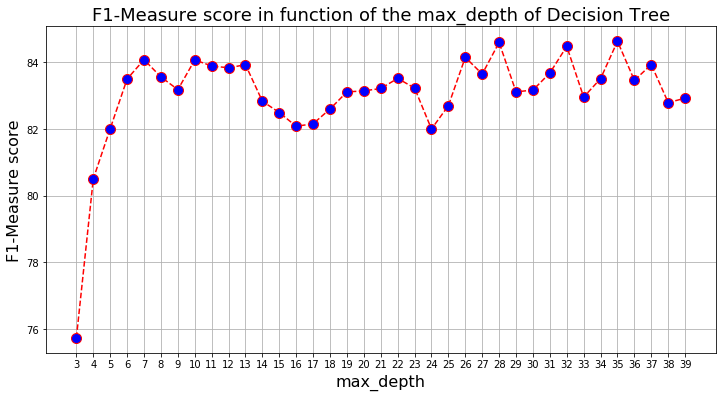

In [11]:
par = best_parameters_search_with_Kfold(0, range(3, 40), X, Y, 
    "in function of the max_depth of Decision Tree", 'max_depth', 10)


Decision Tree Results:


,Train_Score,Test_Score
Accuracy,80.57,83.83
F1-Score,80.57,83.75
Precison,81.06,83.80
Recall,80.57,83.83




Recall and precision scores for each class


,Recall,Precision
Low,0.91,0.92
Medium,0.80,0.81
High,0.75,0.80
Very-high,0.92,0.83


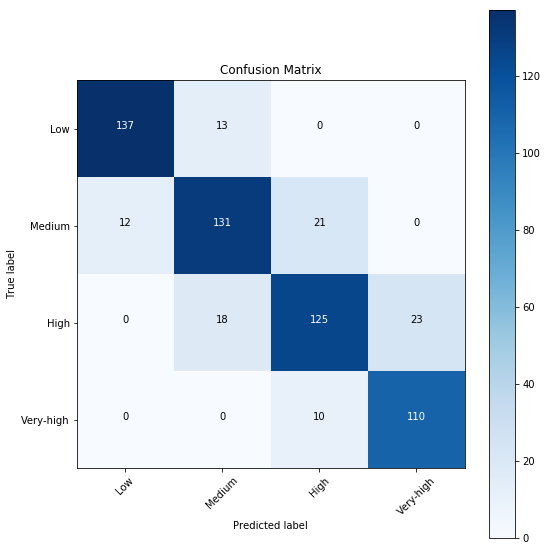

In [12]:
DTresults = Classifier(X, Y, DecisionTreeClassifier(
        criterion = "gini", random_state = np.random.randint(1, 50),
                                max_depth=par), "\nDecision Tree Results:")

## Launch DT on Random forest reduced dataset


Decision Tree Results with RFreduced dataset:


,Train_Score,Test_Score
Accuracy,84.29,87.00
F1-Score,84.20,87.07
Precison,84.58,87.39
Recall,84.29,87.00




Recall and precision scores for each class


,Recall,Precision
Low,0.92,0.91
Medium,0.81,0.87
High,0.87,0.77
Very-high,0.88,0.94


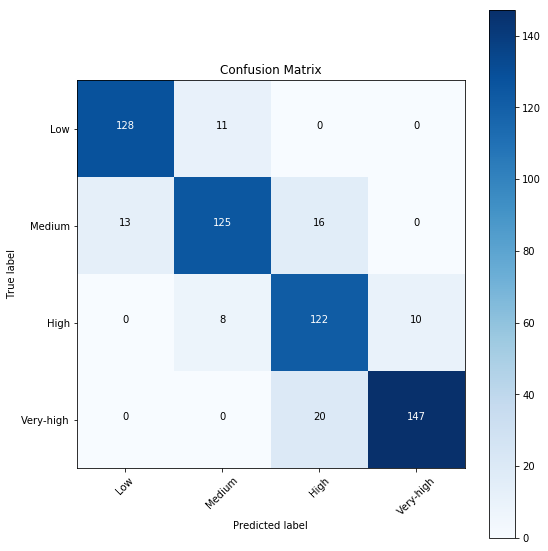

In [13]:
DTresultsReduced = Classifier(X_reduced_RF, Y, DecisionTreeClassifier(
        criterion = "gini", random_state = np.random.randint(1, 50),
                                max_depth=par), "\nDecision Tree Results with RFreduced dataset:")

## 4.2 - Random Forest

>### Bagging
As I have said before, decision trees suffer from high variance; bagging is a general-purpose technique that aims at reducing the variance of a statistical learning method. The Statistical basis behind this technique is that given $n$ independent observations $Z_1, Z_2, \dots, Z_n$, each one with variance equal to $\sigma^2$, the resultant variance of the observation mean $Z$ is equal to $\frac{{\sigma^2}} {{n}}$. <br>
Bagging is usually employed and particularly effective in the context of decision trees.<br>
By pooling predictions, we can incorporate much more knowledge than from any one individual model/tree, each one brings their own background experience and information sources to the problem.
In short, what bagging does is to construct B decision trees using B bootstrapped training sets (generated from a single unique dataset) and average the resulting predictions $f^b$.
Even if each tree has a high variance, combining a big number of trees together in the same procedure reduces the variance.
>>**Bagging relation for prediction**: $f_{{bag}}(x) = \frac{1}{B} \sum_{b=1}^{B} f^b(x)$


**Random Forest** algorithm introduces an improvement over bagged trees that *decorrelates the trees*. When the set of decision trees are built, each time a split in a tree is considered, a **random sample of N predictors** is chosen as split candidates from the entore set of P predictors. Therefore, each split is allowed to use only one of those N predictors (typically $N = \sqrt{{P}}$). A Random Forest with N = P conincide with bagging.<br>

The novelty and great idea of Random Forest is that it forces each split node to consider only a subset of the predictors. This way, the *estimators*, that are the trees of the forest will not be influenced by the same strong predictors of the dataset but they are obliged to consider also other less-strong predictors thence decorrelating the trees. From this rationale comes the model's name Random Forest.<br><br>
The main **limitation** of Random Forest is that a large number of trees can make the algorithm to slow and ineffective for real-time predictions. In general, these algorithms are fast to train, but quite slow to create predictions once they are trained. A more accurate prediction requires more trees, which results in a slower model.<br>
On the other hand, thanks to its structure the Random Forest algorithm produces optimal results even with its default hyperparameters and in addition to that it is pretty **resistant to overfitting**.

<img src="Images/randomforest.png">

## Random Forest Grid-Search for best n_estimators value:

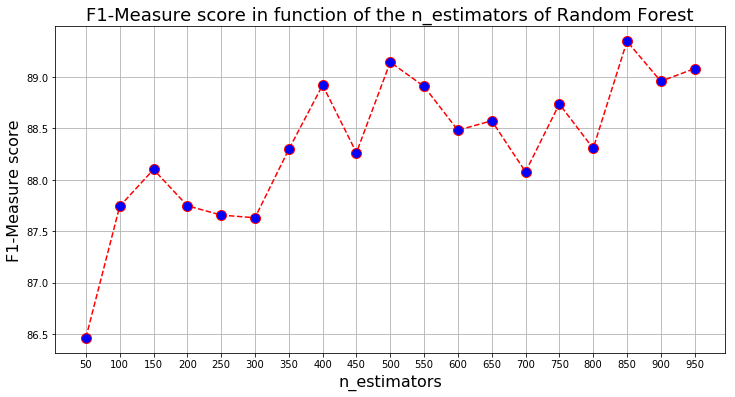

In [14]:
par = best_parameters_search_with_Kfold(1, np.arange(50, 1000, 50), X, Y
        , "in function of the n_estimators of Random Forest", 'n_estimators', 5)


Random Forest Results:


,Train_Score,Test_Score
Accuracy,86.93,89.33
F1-Score,86.91,89.31
Precison,87.27,89.53
Recall,86.93,89.33




Recall and precision scores for each class


,Recall,Precision
Low,0.93,0.96
Medium,0.90,0.82
High,0.80,0.88
Very-high,0.94,0.91


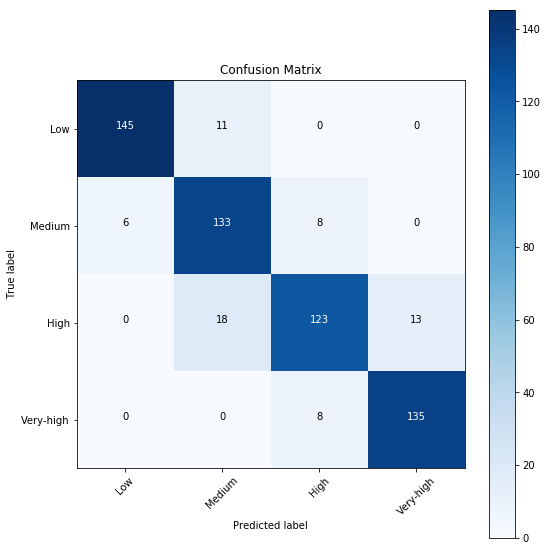

In [15]:
RFresults = Classifier(X, Y, RandomForestClassifier(n_estimators=par, random_state = 
                        np.random.randint(1, 50)), "\nRandom Forest Results:")

## Launch RF on Random forest reduced dataset


Random Forest Results with RFreduced dataset:


,Train_Score,Test_Score
Accuracy,90.50,91.50
F1-Score,90.46,91.50
Precison,90.81,91.54
Recall,90.50,91.50




Recall and precision scores for each class


,Recall,Precision
Low,0.94,0.96
Medium,0.92,0.88
High,0.86,0.88
Very-high,0.94,0.94


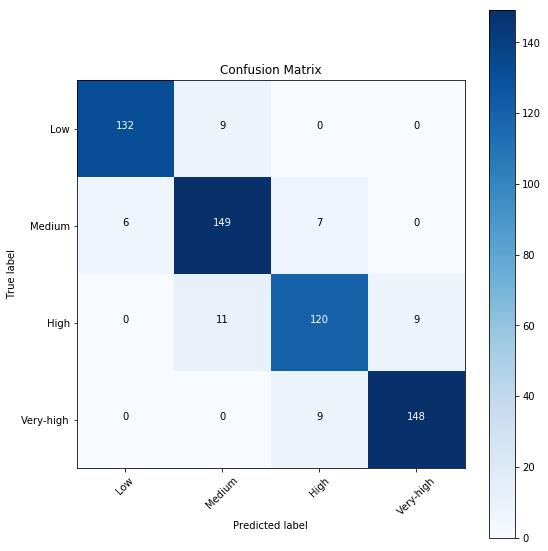

In [16]:
RFresultsReduced = Classifier(X_reduced_RF, Y, RandomForestClassifier(n_estimators=par, random_state = 
                        np.random.randint(1, 50)), "\nRandom Forest Results with RFreduced dataset:")

## Tree Models performance and comments

As it ould be expected, Random Forest algorithm performs better than simple decision tree; this is absolutely reasonable since the random forest merges many outputs of its internal decision trees providing a better estimation and comprehension of the classification problem.<br>
However, Random Forest is much more slow than the Decision Tree in terms of computation time, especially with a high number of estimators (like 800 for example).

Surprisingly, the Random Forest-based method for feature selection has provided good results for both Decision Tree and Random forest models, indeed their overall performances are slightly better, around 3-4% more. Hence, cutting the dataframe size keeping only a subset of features has not only lightened the computation load of the program but also made it faster.<br>
If, for some reasons, the classification task must be made faster, this approach could be taken in high consideration.

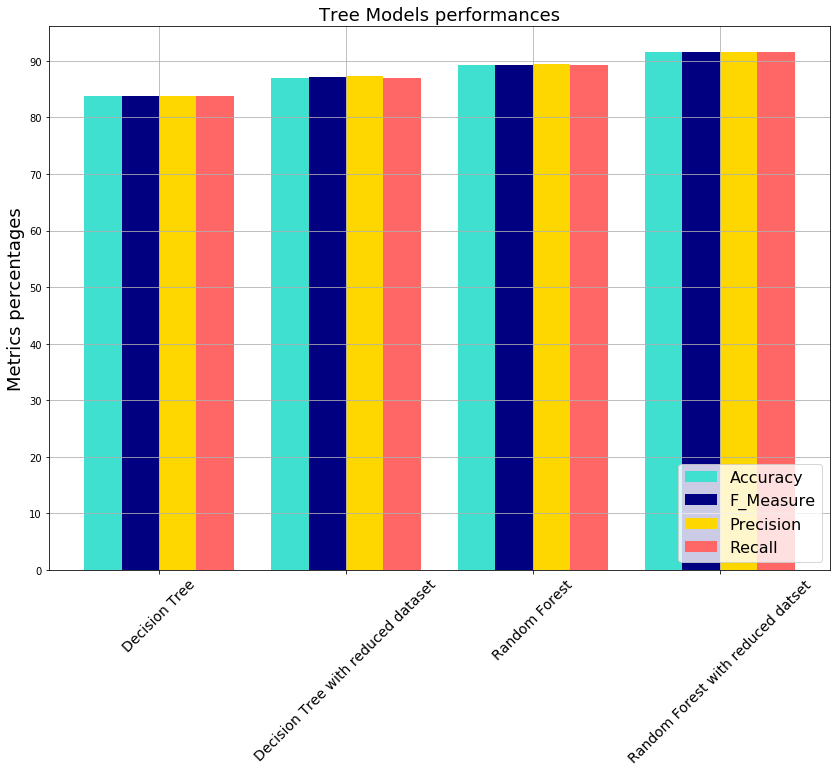

In [17]:
tree_results = np.empty((4, 4))
i=0

for v1, v2, v3, v4 in zip(DTresults, DTresultsReduced, RFresults, RFresultsReduced):
    tree_results[i, 0] = v1
    tree_results[i, 1] = v2
    tree_results[i, 2] = v3
    tree_results[i, 3] = v4
    i += 1
    

x = [0, 1, 2, 3]
width = 0.2
# Plot histogram of feature importances
plt.figure(figsize=(14,10))
plt.title("Tree Models performances", fontsize=18)
plt.ylabel("Metrics percentages", fontsize=18)
plt.yticks(np.arange(0, 120, 10))
plt.xticks([0.3, 1.3, 2.3, 3.3], ["Decision Tree", "Decision Tree with reduced dataset",
                        "Random Forest", "Random Forest with reduced datset"], fontsize=14)
plt.grid(True)
plt.bar(x, tree_results[0, :], width, color='turquoise', label="Accuracy")
plt.bar([0.2, 1.2, 2.2, 3.2], tree_results[1, :], width, color='navy', label="F_Measure")
plt.bar([0.4, 1.4, 2.4, 3.4], tree_results[2, :], width, color='gold', label="Precision")
plt.bar([0.6, 1.6, 2.6, 3.6], tree_results[3, :], width, color='#ff6666', label="Recall")
plt.xticks(rotation=45)
plt.legend(loc='lower right', fontsize = 16)

## 4.3 - Support Vector Machine

The Support Vector Machine or SVM bases its classification task on the concept of hyperplane: the model search for the hyperplane that separates the data into groups in the best possible way. 
> Mathematical definition of a *p-dimensional* hyperplane: $ f(x): \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p = 0$

Given a datsaet that is linearly separable, the best hyperplane among infinite solutions is the one that maximises the **Margin**: the margin is the smallest distance from the training sample $X_i$ of each class to the hyperplane. Hence, the *optimal separating hyperplane* is the furthest one from the training data point $X_i$ of each class.

Given a point $X$, it can lie:
1. Exactly on the hyperplane if $ f(x) = 0$;
2. On the right with respect to the hyperplane [$y_i = 1$]: $ f(x) > 0 \qquad$ (red dots)
3. On the left with respect to the hyperplane if [$y_i = -1$]: $ f(x) < 0 \qquad$  (red dots)
<br><br>
<img src="Images/svmmaxmargin.png">

In summary, M represents the margin of the hyperplane and we want to find the $\beta$ coefficients in order to maximise M. <br><br>
>**The maximal margin hyperplane can be calculated by solving this optimization problem (Hard margin classifier)**: <br><br>
$\max_{{\beta_1, \beta_2, \dots, \beta_p}}M$ <br><br> such that <br><br> $\sum_{k=1}^{p} \beta_k^2 = 1$ <br><br>
$y_i (\beta_0 + \beta_1x_{i1} + \dots + \beta_px_{ip}) >= M $ <br><br> for each $i = 1 \dots N$<br><br>
 
- **M is the width of the Margin**; <br> 
- Note that $y_i (\beta_0 + \beta_1x_{i1} + \dots + \beta_px_{ip}) >= M $ guarantees that each observation is on the correct side (because M is positive) and also that each observation is outside the 'Margin region' (each point is at least at distance equal to M from the hyperplane). <br><br>

However, as I said, this solution to the problem forces the points to stay at least at distance M from the hyprplane; this could be a problem for datsets which have a distribution of samples that do not allow this constraint. <br>
For this reason, a **soft margin classifier** can be created by relaxing the constraint on the minimum distance between the points and the separating hyperplane; in other words, rather than seeking the largest possible margin which separates perfectly each observation on the correct side (and outside the 'margin region'), *the model allows some training observations to be misclassified in order to do a better job in classifying all the remaining observations*.<br><br>

>**Soft margin classifier optimization problem**:<br><br>
$\max_{{\beta_1, \beta_2, \dots, \beta_p, \epsilon_1, \dots, \epsilon_n}}M$ <br><br> such that <br><br> $\sum_{k=1}^{p} \beta_k^2 = 1$ <br><br>
$y_i (\beta_0 + \beta_1x_{i1} + \dots + \beta_px_{ip}) >= M(1-\epsilon_i $ <br><br>$\epsilon_i >= 0$, $\sum_{i=1}^{n} \epsilon_i <= C$ <br><br>

- **C is a non-negative tuning parameter** which bounds the sum of the $\epsilon_i$'s determining the number and the severity of the violations to the margin that we want to tolerate; I can state that the C parameter regulates how much you want the model to find a hyperplane that correctly separates as many instances as possible.<br> 
- $\epsilon_1, \dots, \epsilon_n$ are called '**slack variables**' and they allow individual observations to stay on the wrong side of the margin or the hyperplane.
<br><br>
<img src="Images/cparameter.png">


## SVM Grid-Search for best C value:

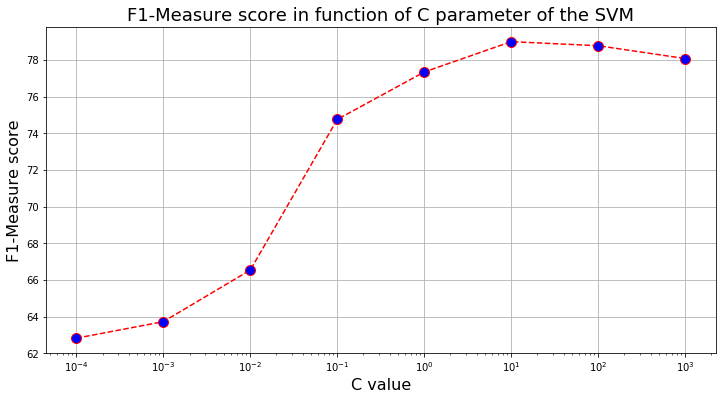

In [18]:
ranges = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

parSVM = best_parameters_search_with_Kfold(2, ranges, X_numerical, Y, 
    "in function of C parameter of the SVM", 'C value', 10)


Linear SVM Results:


,Train_Score,Test_Score
Accuracy,86.93,89.83
F1-Score,86.85,89.78
Precison,87.25,89.96
Recall,86.93,89.83




Recall and precision scores for each class


,Recall,Precision
Low,0.99,0.98
Medium,0.75,0.85
High,0.86,0.78
Very-high,0.99,0.99


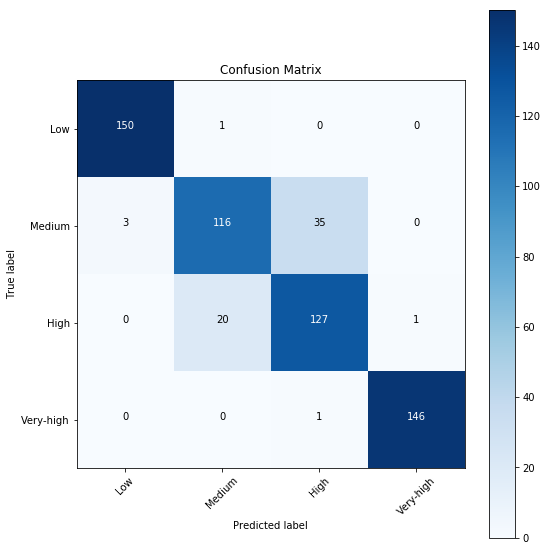

In [19]:
SVMresults = Classifier(X_numerical_std, Y, LinearSVC(C=parSVM, dual=False), "\nLinear SVM Results:")

## Launch SVM on PCA-transformed dataset


Linear SVM Results with PCA-transformed dataset:


,Train_Score,Test_Score
Accuracy,85.79,85.67
F1-Score,85.64,85.58
Precison,85.86,85.50
Recall,85.79,85.67




Recall and precision scores for each class


,Recall,Precision
Low,0.97,0.97
Medium,0.74,0.75
High,0.74,0.74
Very-high,0.97,0.94


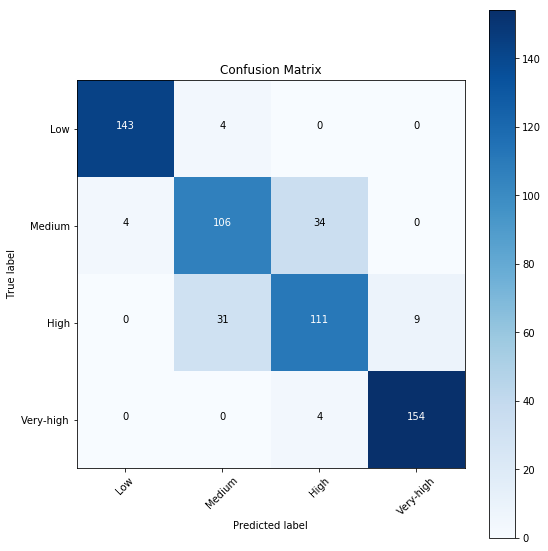

In [20]:
SVMresultsPCA = Classifier(X_pca_pruned_std, Y, LinearSVC(C=parSVM, dual=False),
                           "\nLinear SVM Results with PCA-transformed dataset:")

##  4.4 - K-Nearest Neighbors

K-NN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes (they are labelled) to predict the classification of a new sample point.<br>
Given a new sample $X$ to be classified, **the model calculates the distance between the new point and all the others in the dataset**, then it takes the $K$ nearest points and the new object is classified by a majority vote of its neighbors, so **it is given the most common class among its k nearest neighbors**.<br>
K-NN is based on the concept of feature similarity and n-dimensional spatial distance between points.

K-NN is non-parametric, which means that it does not make any assumptions about the probability distribution of the input. This is useful for applications with input properties that are unknown and therefore makes k-NN more robust than algorithms that are parametric. However, parametric machine learning algorithms tend to produce fewer errors than non-parametric ones, since taking input probabilities into account can influence decision making. 

A key point in K-NN algorithm is the choice of the value of K:

- A low K value means that the algorithm could be strongly influenced by noise points or outliers;
- A high value of K may lead the model to consider too many points and to mix the classes producing low-accurate or wrong predictions;
<br><br>

<img src="Images/knn.png">
<br><br>

**KNN pros**: <br>
- K-NN does not need any training phase at all since the model is the dataset itslef;
- It is an incremental algorithm: if new samples become available, they are simply added to the dataset and the model is updated.
- It is simple and suitable for non-linear data;
- K-NN does not assume any probability distributions on the input data. This can come in handy for inputs where the probability distribution is unknown and is therefore robust. <br><br>

**KNN cons**: <br>
- It is **computationally expensive** and takes a lot of time to produce results compared to other algorithms;
- It requires a lot of memory because it needs to store all data points and it computes the distances between the new point and all the other points each time a new object has to be classified.
- **Sensitive to dataset sample distribution**. If one type of category occurs much more than another, classifying an input will be more biased towards that one category;
- **Sensitive to localized data**. Since k-NN gets all of its information from the input's neighbors, localized anomalies affect outcomes significantly, rather than for an algorithm that uses a generalized view of the data.

> **TODO**: va bene usare la distanza euclidiana? abbiamo uno spazio delle feature adatto a tale metrica?

## KNN Grid-Search for best n_neighbors value:

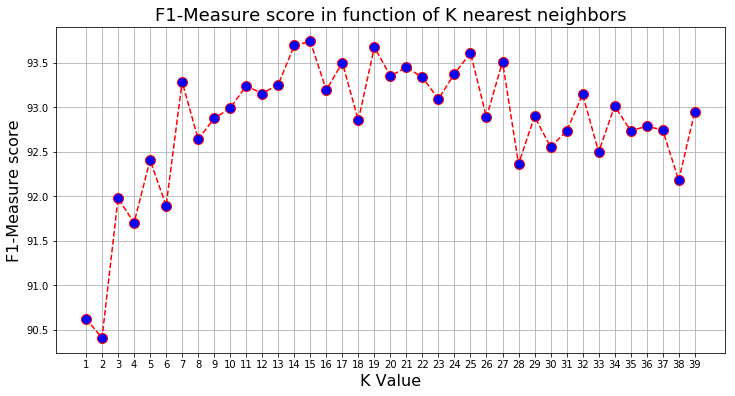

In [21]:
parKNN = best_parameters_search_with_Kfold(3, range(1, 40), X_numerical_std, Y, 
    "in function of K nearest neighbors", 'K Value', 10)


KNN Results:


,Train_Score,Test_Score
Accuracy,92.07,92.33
F1-Score,92.03,92.29
Precison,92.17,92.52
Recall,92.07,92.33




Recall and precision scores for each class


,Recall,Precision
Low,0.96,0.97
Medium,0.95,0.87
High,0.83,0.93
Very-high,0.96,0.92


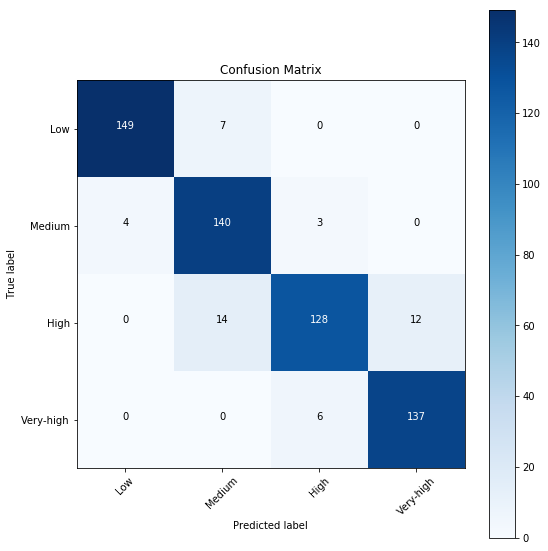

In [22]:
KNNresults = Classifier(X_numerical_std, Y, KNeighborsClassifier(n_neighbors=parKNN), "\nKNN Results:")

## Launch KNN on PCA-transformed dataset


KNN Results with PCA-Transformed dataset:


,Train_Score,Test_Score
Accuracy,92.79,92.83
F1-Score,92.78,92.87
Precison,92.94,93.01
Recall,92.79,92.83




Recall and precision scores for each class


,Recall,Precision
Low,0.97,0.95
Medium,0.92,0.87
High,0.89,0.90
Very-high,0.92,0.99


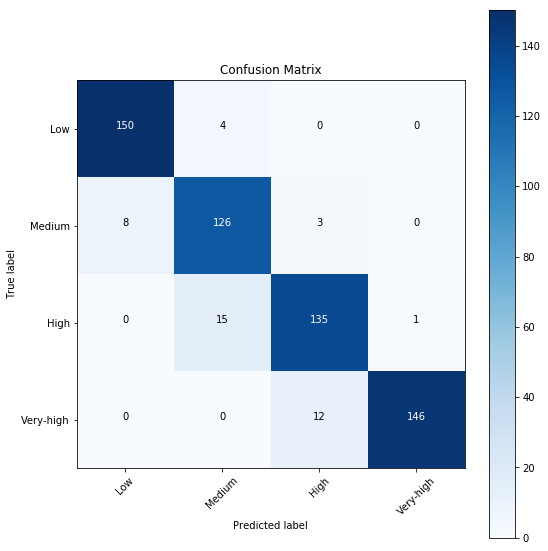

In [23]:
KNNresultsPCA = Classifier(X_pca_pruned_std, Y, KNeighborsClassifier(n_neighbors=parKNN),
                           "\nKNN Results with PCA-Transformed dataset:")

## KNN and SVM performances and comments

I have provided to both the models the normalized version of the dataset containing only numerical features; It seemed to me the best choice since these two algorithms take decisions by manipulating distances.<br>
KNN performs very well, even better than the SVM. Anyway, SVM provides performances that are near to 90% and so thay are extremely good as well.<br>
KNN results seems even too high, maybe its due to the fact that I have set a high value of K (K = 15), and so probably there is some overfitting. However, the K-fold crossvalidation should have mitigated the overfitting.

Finally, I have run the the same classifiers but using the PCA-transformed dataset and I have obtained nearly the same results on each measure as regards KNN, but a little decrease as regards SVM (around 3-4%); this is interesting because the dataset contained only 4 features which are the 4 most important Principal Components obtained by PCA. So, Even if the dataset dimensionality has been reduced a lot, results are still extremely good and there is not a big performance decrease. In this case PCA does a great job.

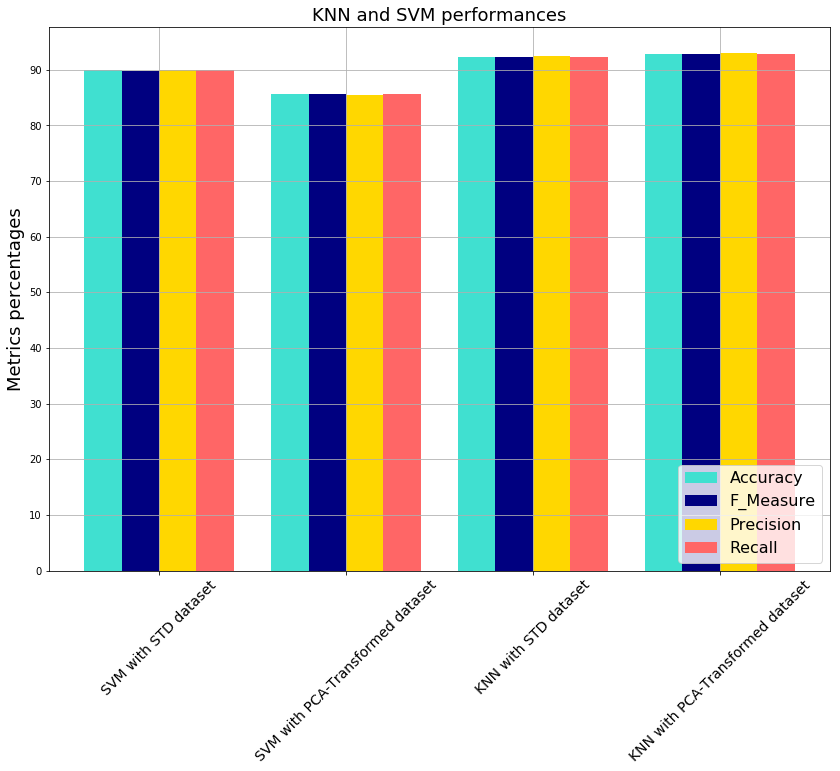

In [24]:
results = np.empty((4, 4))
i=0

for v1, v2, v3, v4 in zip(SVMresults, SVMresultsPCA, KNNresults, KNNresultsPCA):
    results[i, 0] = v1
    results[i, 1] = v2
    results[i, 2] = v3
    results[i, 3] = v4
    i += 1
    

x = [0, 1, 2, 3]
width = 0.2
# Plot histogram of feature importances
plt.figure(figsize=(14,10))
plt.title("KNN and SVM performances", fontsize=18)
plt.ylabel("Metrics percentages", fontsize=18)
plt.yticks(np.arange(0, 120, 10))
plt.xticks([0.3, 1.3, 2.3, 3.3], ["SVM with STD dataset", 
                "SVM with PCA-Transformed dataset", "KNN with STD dataset",
                                  "KNN with PCA-Transformed dataset"], fontsize=14)
plt.grid(True)
plt.bar(x, results[0, :], width, color='turquoise', label="Accuracy")
plt.bar([0.2, 1.2, 2.2, 3.2], results[1, :], width, color='navy', label="F_Measure")
plt.bar([0.4, 1.4, 2.4, 3.4], results[2, :], width, color='gold', label="Precision")
plt.bar([0.6, 1.6, 2.6, 3.6], results[3, :], width, color='#ff6666', label="Recall")
plt.xticks(rotation=45)
plt.legend(loc='lower right', fontsize = 16)

## 4.5 - Overall performance analysis

- A common aspect to all the employed classifiers is that the **two middle classes (Medium-Low and Medium-High) shows worse results in terms of recall and precision**: this means that the models make more mistakes in recognizing them, while they are better in recognizing the classes at the extremes (Low and High).

- The classifier that works best is the KNN while the worst is the Decision Tree classifier; SVM and random forest are in the middle and offer reliable and good results as often happen. However, I launched each classifier with the dataset I retained the best for its characteristics and working principles.

- As regards **computation time** (time to get the classification results), for sure Random forest is the slowest one due to its high number of trees, KNN is probably a bit slower than the SVM and decision tree which provide results in a few seconds.
 

In [26]:
acc = np.array([DTresults[0], RFresults[0], SVMresults[0], KNNresults[0]])
f = np.array([DTresults[1], RFresults[1], SVMresults[1], KNNresults[1]])
prec = np.array([DTresults[2], RFresults[2], SVMresults[2], KNNresults[2]])
rec = np.array([DTresults[3], RFresults[3], SVMresults[3], KNNresults[3]])

print("Here there is a table that summarizes all the results obtained:\n")
a = {'Accuracy': acc, 'F-Measure': f,
         'Precison': prec, 'Recall': rec}
res = pd.DataFrame(data=a, index=['Decision Tree', 'Random Forest', 'SVM', 'K-Nearest Neighbors'])
display(res)

Here there is a table that summarizes all the results obtained:



,Accuracy,F-Measure,Precison,Recall
Decision Tree,83.83,83.75,83.80,83.83
Random Forest,89.33,89.31,89.53,89.33
SVM,89.83,89.78,89.96,89.83
K-Nearest Neighbors,92.33,92.29,92.52,92.33


# 5 - Conclusions

In this analysis I have deeply examined as many characteristics and behaviors of the dataset as I could; I have explored a set of different classifiers trained on the data and seen how they performed. Moreover, I have tried to point out the most effective features which determine the price range of a mobile phone.<br><br>
Even if the best results have been obtained by the KNN model, I would suggest the Random Forest classifier as the best one to classify a new sample in the correct price category because in general it is a much more reliable and resistant algorithm than KNN and , furthermore, I suspect that a strong overfitting is the reason of the extremely good performances of KNN. Last, Random Forest has the highest scores as regards precision and recall of middle classes (*medimum* and *high*), so it manages to perform a good work where the other algorithms encounter difficulties.<br>
The features that contribute the most in the classification task are: *RAM, pixel height and width* (hence the screen resolution) and the *battery power*; by analyzing only such features you can give a quite precise estimate of the price category of the correspondent mobile phone.<br><br>
In conlusion, this analysis has allowed me to dirty my hands in extracting information out of a dataset and using, in a real case, the dimensionality reduction methods and classification algorithms I have studied in theory.